# An Introduction to Matplotlib

- [__Matplotlib Reference__](https://matplotlib.org/stable/plot_types/index)
- [__Pandas User Guide__](https://pandas.pydata.org/docs/user_guide/index.html)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import data
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

## 1. Principles of Data Visualization

[Data Visualization](https://en.wikipedia.org/wiki/Data_and_information_visualization) is the practice of designing and creating graphic or visual representations for data. In the digital era, data viz became an important skill for reasoning and presenting complex, heterogeneous and large scale amounts of data in an understandable way.

From the perspective of __data science__, data visualization is an essential first step within [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA), which seeks to analyze data sets to summarize their main characteristics. Oftentimes, EDA is the first step in an __data-driven application pipeline__, i.e., you should first understand your data before running any complex tool on it. As a result, visualizing the data through graphs is essential.

As a consequence of its central place in data analysis, data visualization is important in both businness and science. In the first case, data scientists/analysist may present data in the form of a [__dashboard__](https://en.wikipedia.org/wiki/Dashboard_(business)) or an infographic. In the second case, scientists need to communicate their results and analysis in an understanble way through figures and tables, thus, through data visualization.

The landscape of data visualization encompasses many tools. On the commercial side, data analysists often use tools such as [Power BI](https://en.wikipedia.org/wiki/Microsoft_Power_BI) or [Tableau](https://en.wikipedia.org/wiki/Tableau_Software). These tools are often synergized with database software such as [SQL](https://en.wikipedia.org/wiki/SQL). __However, this is not the focus of our course__. On the scientific side, figures are used for science communication. When writting papers, a common practice is to generate figures in the programming language of your choice, then integrating them into LaTeX documents. For Python, the main library for data visualization is called [__matplotlib__](https://matplotlib.org/), which will be the focus of this lecture.

Before going over the principles of matplotlib, I would like to highlight the fact that one needs to __read and clean data before visualizing it__. To this end, we are also going to use [__Pandas__](https://pandas.pydata.org/), which is the main Python library for data manipulation and analysis. As such, in Python's data visualization pipeline, one could say that Pandas plays a role analogous to that of SQL in commercial data visualization.

## 2. 1D Plotting

In this section, we are going to discuss different plots over 1 dimension. Usually, this takes the form of the graph of a scalar function, i.e., $f:\mathbb{R}\rightarrow\mathbb{R}$. For this section, we are going to use data extracted from the [AI dashboard on OurWorldInData](https://ourworldindata.org/artificial-intelligence). The plots cover the time evolution of [granted patents related to artificial intelligence](https://ourworldindata.org/grapher/artificial-intelligence-granted-patents-by-industry). __Take a look on the dashboard, download the data and move it to the data folder at the root of this repository__.

### 2.1. Line Plot

A [__line plot__](https://en.wikipedia.org/wiki/Line_chart) plots the curve of a function $f:\mathbb{R}\rightarrow\mathbb{R}$. It takes two arrays $\mathbf{x} = \{x_{i}\}_{i=1}^{n}$ and $\mathbf{y} = \{y_{i}\}_{i=1}^{n}$ where $y_{i} = f(x_{i})$ and connets the points $(x_{i},y_{i})$ with $(x_{i+1},y_{i+1})$ through a straight line.

Due the fact that this plot connects points through a straight line, one can think of the overall curve as a discrete approximation of the true graph $\{(x,f(x))\text{ such that }x\in\mathbb{R}\}$. This approximation is obtained with linear interpolation.

__Reading data with Pandas.__ As you may have noticed, the data exported by OurWorldInData comes at the form of a __Comma Separated Value__ (CSV) table. In this format, data is structured as a table on the following format,

```
hea1,hea2,hea3,...,hean
v_11,v_12,v_13,...,v_1n\n
v_21,v_22,v_23,...,v_2n\n
...
v_m1,v_m2,_vm3,...,v_mn
```

where "\n" indicates a __line break__, and "hea" indicates the heading, i.e., the name of the column. CSV readers can take advantage of this structure for separating the values and generating a table. In our case we read the CSV file with ```pd.read_csv```, which is shown below,

In [3]:
df = pd.read_csv('../data/artificial-intelligence-granted-patents-by-industry.csv')

once the CSV file is loaded, we can visualie it,

In [35]:
display(df)

Entity      Code  Year  \
0    Argentina       ARG  2019   
1    Argentina       ARG  2017   
2    Argentina       ARG  2018   
3    Australia       AUS  2020   
4    Australia       AUS  2019   
..         ...       ...   ...   
378      World  OWID_WRL  2014   
379      World  OWID_WRL  2013   
380      World  OWID_WRL  2012   
381      World  OWID_WRL  2011   
382      World  OWID_WRL  2010   

     Patent applications granted - Field: Banking and finance  \
0                                                    0          
1                                                    0          
2                                                    0          
3                                                   22          
4                                                   23          
..                                                 ...          
378                                                 97          
379                                                 63          
380                                                 57          
381                                                 46          
382                                                 31          

     Patent applications granted - Field: Industry and manufacturing  \
0                                                    0                 
1                                                    0                 
2                                                    1                 
3                                                   23                 
4                                                   12                 
..                                                 ...                 
378                                                154                 
379                                                133                 
380                                                109                 
381                                                 78                 
382                                                 64                 

     Patent applications granted - Field: Energy management  \
0                                                    0        
1                                                    1        
2                                                    0        
3                                                   19        
4                                                    6        
..                                                 ...        
378                                                271        
379                                                164        
380                                                214        
381                                                151        
382                                                118        

     Patent applications granted - Field: Physical sciences and engineering  \
0                                                    0                        
1                                                    1                        
2                                                    3                        
3                                                   22                        
4                                                   11                        
..                                                 ...                        
378                                                144                        
379                                                158                        
380                                                127                        
381                                                109                        
382                                                 67                        

     Patent applications granted - Field: Security  \
0                                                0   
1                                                0   
2                                                0   
3                              

In this case, df denotes a ```pandas Data Frame```. You can think of it as a 2D numpy array (a matrix) with special meta-data. For instance, the columns have names. This facts allows you to manipulate pandas DataFrames somewhat like dictionaries,

In [36]:
display(df['Entity'])

0      Argentina
1      Argentina
2      Argentina
3      Australia
4      Australia
         ...    
378        World
379        World
380        World
381        World
382        World
Name: Entity, Length: 383, dtype: object

In [Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html), DataFrames are defined as follows,

> Two-dimensional, size-mutable, potentially heterogeneous tabular data.

this is very different from NumPy ndarrays, which are [multidimensional, homogeneous array of fixed-size items](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html). The design choice of Pandas allows for more flexibility, often needed to process spreadsheets, but keep in mind that this has a memory/efficiency price.

In our first plot, we are going to consider the evolution of patents worldwide. To that end, we need to __filter the rows of the DataFrame__, which is done in the next code block,

In [38]:
df_world = df.loc[df['Entity'] == 'World']
df_world

Entity      Code  Year  \
372  World  OWID_WRL  2020   
373  World  OWID_WRL  2019   
374  World  OWID_WRL  2018   
375  World  OWID_WRL  2017   
376  World  OWID_WRL  2016   
377  World  OWID_WRL  2015   
378  World  OWID_WRL  2014   
379  World  OWID_WRL  2013   
380  World  OWID_WRL  2012   
381  World  OWID_WRL  2011   
382  World  OWID_WRL  2010   

     Patent applications granted - Field: Banking and finance  \
372                                                751          
373                                                881          
374                                                863          
375                                                708          
376                                                406          
377                                                219          
378                                                 97          
379                                                 63          
380                                                 57          
381                                                 46          
382                                                 31          

     Patent applications granted - Field: Industry and manufacturing  \
372                                               1255                 
373                                               1427                 
374                                               1237                 
375                                                985                 
376                                                581                 
377                                                282                 
378                                                154                 
379                                                133                 
380                                                109                 
381                                                 78                 
382                                                 64                 

     Patent applications granted - Field: Energy management  \
372                                               1318        
373                                               1200        
374                                               1010        
375                                                719        
376                                                492        
377                                                319        
378                                                271        
379                                                164        
380                                                214        
381                                                151        
382                                                118        

     Patent applications granted - Field: Physical sciences and engineering  \
372                                                965                        
373                                                921                        
374                                                858                        
375                                                558                        
376                                                364                        
377                                                241                        
378                                                144                        
379                                                158                        
380                                                127                        
381                                                109                        
382                                                 67                        

     Patent applications granted - Field: Security  \
372                                           1527   
373                                           1489   
374                                           1416   
375                                            998   
376                  

here, we use the [__.loc__](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) method of DataFrames, which, along its many usages, allows us to select rows from binary values. Note that ```df['Entity'] == 'World'``` is a list with ```True``` whenever the i-th element of ```df['Entity']``` is ```True```, and ```False``` otherwise.

now, note that the DataFrame is structured such that at each column we have the patents of a certain type of industry. At first, we want to plot the total amount of patents, worldwide, by year. To that end we want to sum the DataFrame over these columns __- but we don't want to sum over all columns -__. So we need to select the pertinent columns,

In [51]:
columns = list(df_world.columns)
columns_to_sum = columns[3:-1]
columns_to_sum = columns_to_sum[::-1]

In [52]:
columns_to_sum

['Patent applications granted - Field: Personal devices and computing',
 'Patent applications granted - Field: Telecommunications',
 'Patent applications granted - Field: Business',
 'Patent applications granted - Field: Transportation',
 'Patent applications granted - Field: Life sciences',
 'Patent applications granted - Field: Security',
 'Patent applications granted - Field: Physical sciences and engineering',
 'Patent applications granted - Field: Energy management',
 'Patent applications granted - Field: Industry and manufacturing',
 'Patent applications granted - Field: Banking and finance']

After we defined the columns we are going to sum over, we can extract the sum value by using ```.apply```. This method takes a __function__ and applies the function over an axis of the DataFrame. Since we want to apply a __summation__ over columns, we choose ```axis=1```,

In [58]:
x = df_world['Year']
y = df_world.apply(lambda row: sum([row[c] for c in columns_to_sum]), axis=1)

In [59]:
print(x.shape, y.shape)

(11,) (11,)


next, we can do the line plot by using ```plt.plot```, which takes as arguments the arrays $\mathbf{x} \in \mathbb{R}^{n}$ and $\mathbf{y} \in \mathbb{R}^{n}$

Text(0.5, 0, 'Year')

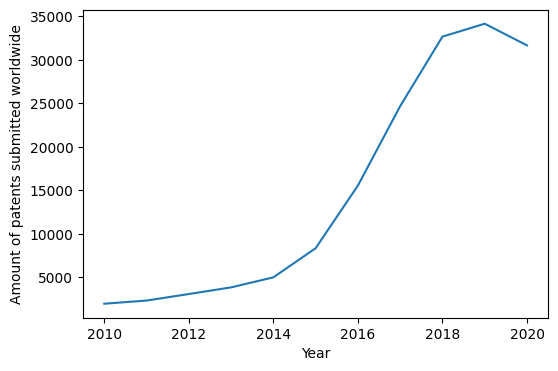

In [60]:
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.ylabel("Amount of patents submitted worldwide")
plt.xlabel("Year")

note that we can highlight the fact that data is not actually continuous by using ```plt.scatter``` alongside ```plt.plot```. Its syntax is somewhat the same. We are going to cover scatter plots later in this lecture.

Text(0.5, 0, 'Year')

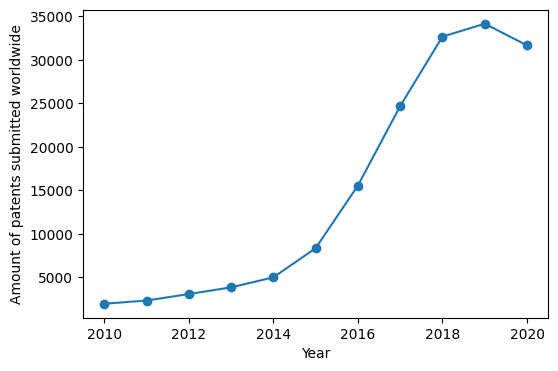

In [57]:
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.scatter(x, y)
plt.ylabel("Amount of patents submitted worldwide")
plt.xlabel("Year")

#### 2.1.1. Line Plot + Area 

Besides showing aggregate values, we could instead display the average amount of patents around the fields of industry, and shadow the __confidence region__ around the average, that is, highlight the area around $[\mu_{t} - \alpha\sigma_{t}, \mu_{t} + \alpha\sigma_{t}]$, where,

$$\mu_{t} = \dfrac{1}{N}\sum_{i=1}^{N}x_{ti}$$

and

$$\sigma_{t}^{2} = \dfrac{1}{N-1}\sum_{i=1}^{N}(x_{ti} - \mu_{t})^{2}$$

__Note.__ By looking at the values of ```df_world``` we see that the amount of patents is highly heterogeneous. As a result, $\sigma_{t}$ is huge, reflecting the fact that a wide range of values around the mean is acceptable. Here we choose $\alpha=0.1$ to illustrate the idea, but usually one chooses $\alpha = 2$ to display the $95\%$ confidence interval.

In [12]:
x = df_world['Year']
mu = df_world.apply(lambda row: np.array([row[c] for c in columns_to_sum]).mean(), axis=1)
std = df_world.apply(lambda row: np.array([row[c] for c in columns_to_sum]).std(), axis=1)

Text(0.5, 0, 'Year')

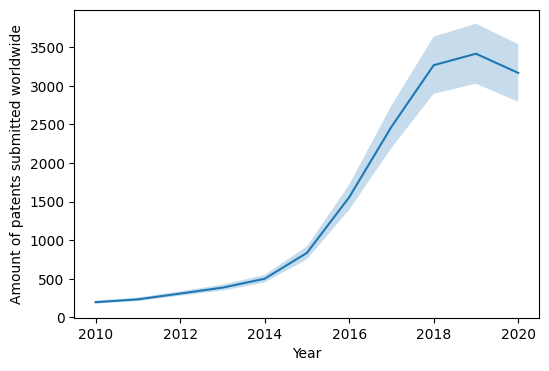

In [63]:
plt.figure(figsize=(6, 4))
plt.plot(x, mu)
plt.fill_between(x, mu + .1 * std, mu - .1 * std, alpha=0.25)
plt.ylabel("Amount of patents submitted worldwide")
plt.xlabel("Year")

#### 2.1.2. Stack Plot

Now we move to the effective reproduction of [OurWorldInData's dashboard](https://ourworldindata.org/grapher/artificial-intelligence-granted-patents-by-industry). We want to create a __stacked plot__, i.e., we want to stack the the values per field on top of each other. Let $\mathbf{X} = {x_{ti}}_{t,i}$ with $2010 \leq t \leq 2020$ and $1 \leq i \leq 10$. This plot shadowes the region between the curves,

$$(\mathbf{X}_{:, 0}, \mathbf{X}_{:, 0} + \mathbf{X}_{:, 1})\text{ and }(\mathbf{X}_{:, 0} + \mathbf{X}_{:, 1}, \mathbf{X}_{:, 0} + \mathbf{X}_{:, 1} + \mathbf{X}_{:, 2})$$

$$...$$

$$(\mathbf{X}_{:, 0} + \mathbf{X}_{:, 1} + \cdots + \mathbf{X}_{:, 8}, \mathbf{X}_{:, 0} + \mathbf{X}_{:, 1} + \cdots + \mathbf{X}_{:, 8} + \mathbf{X}_{:, 9})\text{ and }(\mathbf{X}_{:, 0} + \mathbf{X}_{:, 1} + \cdots + \mathbf{X}_{:, 9}, \mathbf{X}_{:, 0} + \mathbf{X}_{:, 1} + \cdots + \mathbf{X}_{:, 9} + \mathbf{X}_{:, 10})$$

where $\mathbf{X}_{:, 0} = (0,\cdots,0)$. As such, we need a __cumulative sum over the columns of the DataFrame__.

In [14]:
df_world

Entity      Code  Year  \
372  World  OWID_WRL  2020   
373  World  OWID_WRL  2019   
374  World  OWID_WRL  2018   
375  World  OWID_WRL  2017   
376  World  OWID_WRL  2016   
377  World  OWID_WRL  2015   
378  World  OWID_WRL  2014   
379  World  OWID_WRL  2013   
380  World  OWID_WRL  2012   
381  World  OWID_WRL  2011   
382  World  OWID_WRL  2010   

     Patent applications granted - Field: Banking and finance  \
372                                                751          
373                                                881          
374                                                863          
375                                                708          
376                                                406          
377                                                219          
378                                                 97          
379                                                 63          
380                                                 57          
381                                                 46          
382                                                 31          

     Patent applications granted - Field: Industry and manufacturing  \
372                                               1255                 
373                                               1427                 
374                                               1237                 
375                                                985                 
376                                                581                 
377                                                282                 
378                                                154                 
379                                                133                 
380                                                109                 
381                                                 78                 
382                                                 64                 

     Patent applications granted - Field: Energy management  \
372                                               1318        
373                                               1200        
374                                               1010        
375                                                719        
376                                                492        
377                                                319        
378                                                271        
379                                                164        
380                                                214        
381                                                151        
382                                                118        

     Patent applications granted - Field: Physical sciences and engineering  \
372                                                965                        
373                                                921                        
374                                                858                        
375                                                558                        
376                                                364                        
377                                                241                        
378                                                144                        
379                                                158                        
380                                                127                        
381                                                109                        
382                                                 67                        

     Patent applications granted - Field: Security  \
372                                           1527   
373                                           1489   
374                                           1416   
375                                            998   
376                  

First, to get the same order of the proportions of the dashboard in OurWorldInData, we need to __reverse the columns of the DataFrame__,

In [117]:
# Reverses order of columns
# NOTE: we need to reverse the dataframe in
#       order to get the same order of proportions
#       as OurWorldInData.
reversed_df = df_world[df_world.columns[::-1]]
display(reversed_df)

Continent  \
372     World   
373     World   
374     World   
375     World   
376     World   
377     World   
378     World   
379     World   
380     World   
381     World   
382     World   

     Patent applications granted - Field: Personal devices and computing  \
372                                              13813                     
373                                              14356                     
374                                              13689                     
375                                              10124                     
376                                               6076                     
377                                               3119                     
378                                               1824                     
379                                               1408                     
380                                               1062                     
381                                                837                     
382                                                727                     

     Patent applications granted - Field: Telecommunications  \
372                                               4848         
373                                               5529         
374                                               5224         
375                                               3951         
376                                               2269         
377                                               1249         
378                                                742         
379                                                544         
380                                                396         
381                                                302         
382                                                239         

     Patent applications granted - Field: Business  \
372                                           3218   
373                                           3212   
374                                           2899   
375                                           2167   
376                                           1436   
377                                            710   
378                                            445   
379                                            370   
380                                            356   
381                                            251   
382                                            219   

     Patent applications granted - Field: Transportation  \
372                                               1679     
373                                               2354     
374                                               2689     
375                                               2335     
376                                               1653     
377                                                863     
378                                                426     
379                                                239     
380                                                189     
381                                                108     
382                                                 95     

     Patent applications granted - Field: Life sciences  \
372                                               2290    
373                                               2785    
374                                               2786    
375                                               2143    
376                                               1594    
377                                               1054    
378                                                709    
379                                                640    
380                                                470    
381                                                371    
382                                                355    

     Patent applications granted - Fie

Next, we need to compute the cumulative sum over __numeric columns only__. This can be done by excluding the textual columns,

In [119]:
# Computes the cumulative sum
# NOTE: we need to filter the numeric columns.
cumulative_df = reversed_df.iloc[:, 1:-3].cumsum(axis=1)

next, we get the values of the arrays on each column. We need to __pre-append__ a vector of zeros (i.e., $\mathbf{X}_{:, 0}$),

In [ ]:
cols = list(cumulative_df.columns)
cumulative_y = [np.zeros_like(x)] + [cumulative_df[c].values for c in cols]

In [115]:
cumulative_df

Patent applications granted - Field: Personal devices and computing  \
372                                              13813                     
373                                              14356                     
374                                              13689                     
375                                              10124                     
376                                               6076                     
377                                               3119                     
378                                               1824                     
379                                               1408                     
380                                               1062                     
381                                                837                     
382                                                727                     

     Patent applications granted - Field: Telecommunications  \
372                                              18661         
373                                              19885         
374                                              18913         
375                                              14075         
376                                               8345         
377                                               4368         
378                                               2566         
379                                               1952         
380                                               1458         
381                                               1139         
382                                                966         

     Patent applications granted - Field: Business  \
372                                          21879   
373                                          23097   
374                                          21812   
375                                          16242   
376                                           9781   
377                                           5078   
378                                           3011   
379                                           2322   
380                                           1814   
381                                           1390   
382                                           1185   

     Patent applications granted - Field: Transportation  \
372                                              23558     
373                                              25451     
374                                              24501     
375                                              18577     
376                                              11434     
377                                               5941     
378                                               3437     
379                                               2561     
380                                               2003     
381                                               1498     
382                                               1280     

     Patent applications granted - Field: Life sciences  \
372                                              25848    
373                                              28236    
374                                              27287    
375                                              20720    
376                                              13028    
377                                               6995    
378                                               4146    
379                                               3201    
380                                               2473    
381                                               1869    
382                                               1635    

     Patent applications granted - Field: Security  \
372                                          27375   
373                                          29725   
374                                          28703   
375                         

Text(0.5, 0, 'Year')

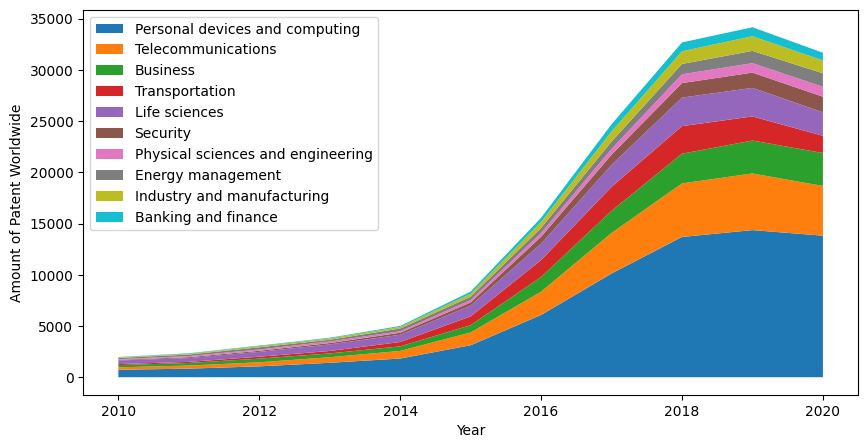

In [120]:
plt.figure(figsize=(10, 5))

for name, cy1, cy2 in zip(cols, cumulative_y[1:], cumulative_y[:-1]):
    plt.fill_between(x, cy1, cy2, label=name[37:])
plt.legend(loc='upper left')

plt.ylabel('Amount of Patent Worldwide')
plt.xlabel('Year')

__Note.__ The same effect could be acquired with NumPy,

In [121]:
x = df_world['Year']
y = [np.zeros_like(x)]
for c in columns_to_sum:
    y.append(df_world.apply(lambda row: row[c], axis=1).values)
y = np.array(y)

In [122]:
cumulative_y = np.cumsum(y, axis=0)

In [123]:
cumulative_y[1, :]

array([13813, 14356, 13689, 10124,  6076,  3119,  1824,  1408,  1062,
         837,   727])

In [124]:
cumulative_y

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [13813, 14356, 13689, 10124,  6076,  3119,  1824,  1408,  1062,
          837,   727],
       [18661, 19885, 18913, 14075,  8345,  4368,  2566,  1952,  1458,
         1139,   966],
       [21879, 23097, 21812, 16242,  9781,  5078,  3011,  2322,  1814,
         1390,  1185],
       [23558, 25451, 24501, 18577, 11434,  5941,  3437,  2561,  2003,
         1498,  1280],
       [25848, 28236, 27287, 20720, 13028,  6995,  4146,  3201,  2473,
         1869,  1635],
       [27375, 29725, 28703, 21718, 13715,  7296,  4339,  3335,  2580,
         1955,  1694],
       [28340, 30646, 29561, 22276, 14079,  7537,  4483,  3493,  2707,
         2064,  1761],
       [29658, 31846, 30571, 22995, 14571,  7856,  4754,  3657,  2921,
         2215,  1879],
       [30913, 33273, 31808, 23980, 15152,  8138,  4908,  3790,  3030,
         2293,  1943],
       [31664, 34154, 32671, 24688, 15558,  8357,  5005,  38

Text(0.5, 0, 'Year')

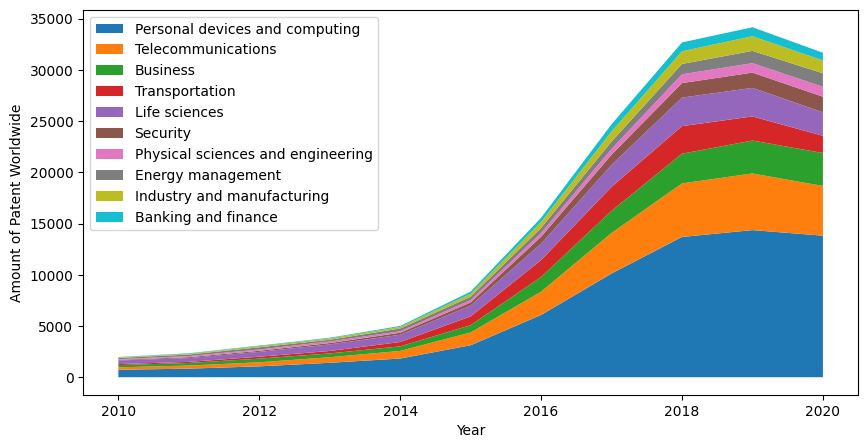

In [125]:
plt.figure(figsize=(10, 5))

for name, cy1, cy2 in zip(cols, cumulative_y[1:], cumulative_y[:-1]):
    plt.fill_between(x, cy1, cy2, label=name[37:])
plt.legend(loc='upper left')

plt.ylabel('Amount of Patent Worldwide')
plt.xlabel('Year')

### 2.2. Bar Plot

Opposed to line plots, bar plots give an idea of __discreteness__. In matplotlib, the syntax for a bar plot is similar to that of a line plot,

In [127]:
x = df_world['Year']
y = df_world.apply(lambda row: sum([row[c] for c in columns_to_sum]), axis=1)

Text(0.5, 0, 'Year')

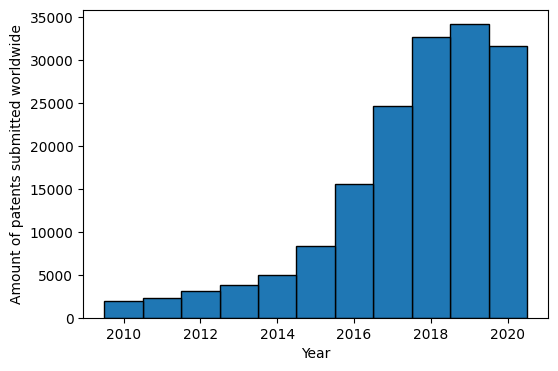

In [128]:
plt.figure(figsize=(6, 4))
plt.bar(x, y, width=1, edgecolor='k')
plt.ylabel("Amount of patents submitted worldwide")
plt.xlabel("Year")

Note a few differences. We used the __width__ argument to set the width of the bars. For instance, we could make a bar plot with slightly more thin bars,

Text(0.5, 0, 'Year')

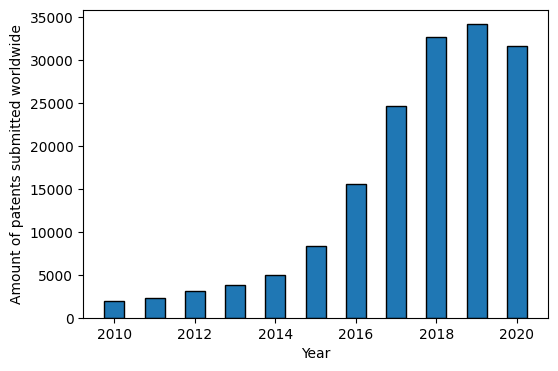

In [129]:
plt.figure(figsize=(6, 4))
plt.bar(x, y, width=0.5, edgecolor='k')
plt.ylabel("Amount of patents submitted worldwide")
plt.xlabel("Year")

and the __edgecolor__ is used to set the color for the edges of the bar. We could change the color of the bars using the __facecolor__ argument,

Text(0.5, 0, 'Year')

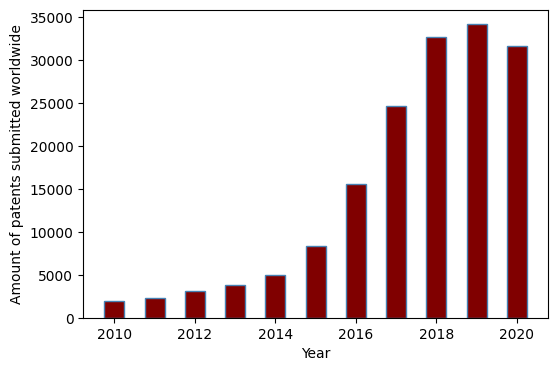

In [131]:
plt.figure(figsize=(6, 4))
plt.bar(x, y, width=0.5, edgecolor='steelblue', facecolor='maroon')
plt.ylabel("Amount of patents submitted worldwide")
plt.xlabel("Year")

#### 2.2.1. Bar Plot + Error Bars

In addition, we could display errorbars on top of the barplot. This can be done with the argument __yerr__,

In [20]:
x = df_world['Year']
mu = df_world.apply(lambda row: np.array([row[c] for c in columns_to_sum]).mean(), axis=1)
std = df_world.apply(lambda row: np.array([row[c] for c in columns_to_sum]).std(), axis=1)

Text(0.5, 0, 'Year')

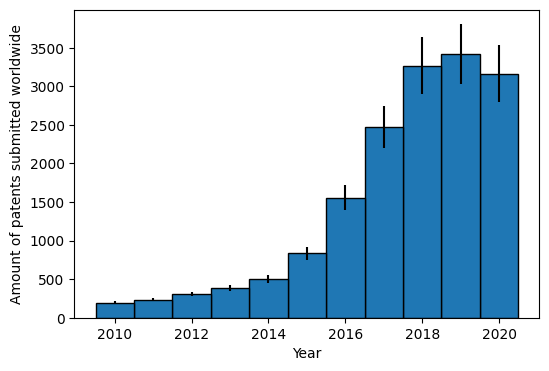

In [21]:
plt.figure(figsize=(6, 4))
plt.bar(x, mu, yerr=.1 * std, width=1, edgecolor='k')
plt.ylabel("Amount of patents submitted worldwide")
plt.xlabel("Year")

#### 2.2.2. Stacked Bar Plot

As a final example on bar plots, let us show a __stacked barplot__. Here, we are interested in displaying the __share of patents for each field on each year__. Here, the share of the market is expressed in terms of a percentage of the total number of patents on each year.

In [147]:
x = df_world['Year'].values
y = []
for c in columns_to_sum:
    y.append(df_world.apply(lambda row: row[c], axis=1).values)
y = np.array(y)

print(x.shape, y.shape)

(11,) (10, 11)


__Note.__ we have $n = 10$ fields and $m = 11$ years. $y \in \mathbb{R}^{n \times m}$ and $\mathbf{x} \in \mathbb{R}^{m}$. We need to calculate the total amount of patents per year, i.e.,

$$T_{j} = \sum_{i=1}^{n}y_{ij}$$

i.e., we need to perform a sum of each row. This is acquired by ```y.sum(axis=0)```,

In [148]:
total_per_year = y.sum(axis=0)

In [149]:
total_per_year.shape

(11,)

In [150]:
total_per_year

array([31664, 34154, 32671, 24688, 15558,  8357,  5005,  3853,  3087,
        2339,  1974])

Now that we have the __total amount of patents__ per year, we can get the percentages using,

$$p_{ij} = \frac{y_{ij}}{T_{j}} = \frac{y_{ij}}{\sum_{i}y_{ij}}$$

or,

In [155]:
# Using T = total_per_year
percentage_y = y / total_per_year

# Using the direct formula
# percentage_y = y / y.sum(axis=0)

__Note.__ NumPy's broadcasting rules takes care of performing the right operation. Indeed,

In [154]:
print(y.shape, total_per_year.shape)

(10, 11) (11,)


as a consequence,


|Array|Axis 0|Axis 1|
|-----|------|------|
|y    |10    | 11   |
|total\_per\_year    |None    | 11   |
|percentage\_year    |10      | 11   |

In [152]:
percentage_y

array([[0.43623674, 0.42033144, 0.41899544, 0.41007777, 0.39053863,
        0.37322006, 0.36443556, 0.36542954, 0.34402332, 0.35784523,
        0.36828774],
       [0.15310763, 0.16188441, 0.15989716, 0.16003727, 0.14584137,
        0.14945555, 0.14825175, 0.14118868, 0.12827988, 0.12911501,
        0.12107396],
       [0.10162961, 0.09404462, 0.08873313, 0.08777544, 0.09229978,
        0.08495872, 0.08891109, 0.09602907, 0.11532232, 0.10731082,
        0.11094225],
       [0.05302552, 0.06892311, 0.08230541, 0.09458036, 0.10624759,
        0.10326672, 0.08511489, 0.06202959, 0.06122449, 0.04617358,
        0.04812563],
       [0.07232188, 0.08154243, 0.0852744 , 0.08680331, 0.10245533,
        0.12612181, 0.14165834, 0.16610433, 0.15225138, 0.15861479,
        0.17983789],
       [0.04822511, 0.04359665, 0.04334119, 0.0404245 , 0.04415735,
        0.03601771, 0.03856144, 0.03477809, 0.03466148, 0.03676785,
        0.02988855],
       [0.03047625, 0.02696609, 0.02626182, 0.02260207, 0.

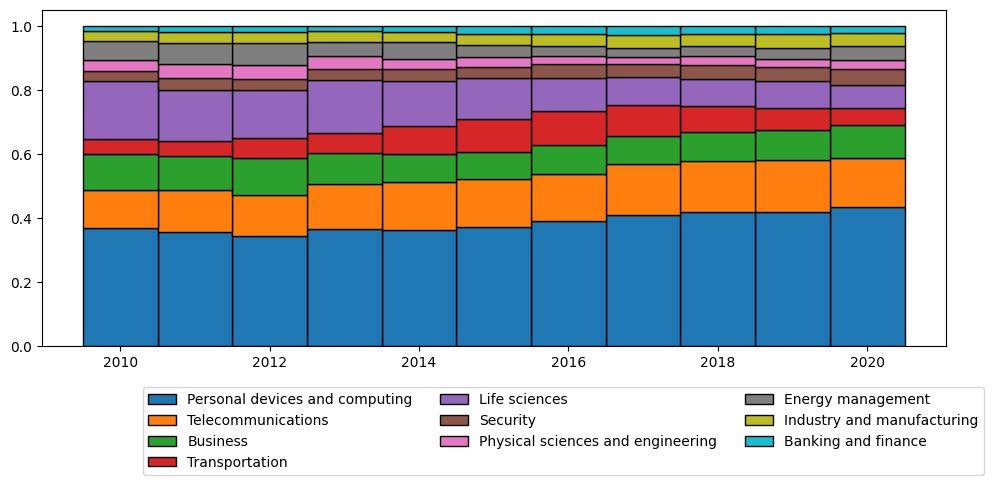

In [153]:
plt.figure(figsize=(10, 5))

offset = np.zeros_like(x).astype(percentage_y.dtype)
for name, py in zip(columns_to_sum, percentage_y):
    plt.bar(x, py, width=1, bottom=offset, label=name[37:], edgecolor='k')
    offset += py

plt.legend(ncol=3, bbox_to_anchor=(1.05, -0.1))
plt.tight_layout()

### 2.3. Box Plot

A [Box Plot](https://en.wikipedia.org/wiki/Box_plot) is a method for locally demonstrating the locality, spread and skewness of numerical data through their [__quantiles__](https://en.wikipedia.org/wiki/Quartile). In this section we are going to study the __distribution__ of patents accross different continents. First, let us separate the data according to their continents,

In [161]:
countries = df['Entity'].values

In [162]:
countries_by_continent = {
    'South America': ['Argentina', "Brazil", 'Chile', 'Colombia',
     'Peru', 'Uruguay'],
    'Europe': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Denmark',
     'Finland', 'France', 'Germany', 'Greece', 'Hungary',
     'Ireland', 'Italy', 'Lithuania', 'Luxembourg', 'Netherlands',
     'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia',
     'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
     'United Kingdom'],
    'North America': ['Canada', 'United States', 'Mexico'],
    'Asia': ['Brunei', 'China', 'Hong Kong', 'India', 'Indonesia', 'Iran',
             'Israel', 'Japan', 'Malaysia', 'Philippines', 'Singapore',
             'South Korea', 'Sri Lanka', 'Taiwan', 'Turkey'], # Asia
    'Africa': ['Kenya', 'South Africa', 'Morocco'], # Africa
    'Oceania': ['Australia', 'New Zealand'], # Oceania
    'World': ['World']
}

Now that we mapped the continents to the countries that are part of them, we can create a list with the continent of each country, by checking whether ```country ∈ countries_by_continent[continent]```,

In [163]:
continents = []
for c in countries:
    for continent in countries_by_continent:
        if c in countries_by_continent[continent]:
            continents.append(continent)

This creates a list with the same number of elements as the number of rows in the DataFrame. We can create a new column in the DataFrame as if we were creating a new field in a new dictionary, that is,

In [164]:
df['Continent'] = continents

In [165]:
df

Entity      Code  Year  \
0    Argentina       ARG  2019   
1    Argentina       ARG  2017   
2    Argentina       ARG  2018   
3    Australia       AUS  2020   
4    Australia       AUS  2019   
..         ...       ...   ...   
378      World  OWID_WRL  2014   
379      World  OWID_WRL  2013   
380      World  OWID_WRL  2012   
381      World  OWID_WRL  2011   
382      World  OWID_WRL  2010   

     Patent applications granted - Field: Banking and finance  \
0                                                    0          
1                                                    0          
2                                                    0          
3                                                   22          
4                                                   23          
..                                                 ...          
378                                                 97          
379                                                 63          
380                                                 57          
381                                                 46          
382                                                 31          

     Patent applications granted - Field: Industry and manufacturing  \
0                                                    0                 
1                                                    0                 
2                                                    1                 
3                                                   23                 
4                                                   12                 
..                                                 ...                 
378                                                154                 
379                                                133                 
380                                                109                 
381                                                 78                 
382                                                 64                 

     Patent applications granted - Field: Energy management  \
0                                                    0        
1                                                    1        
2                                                    0        
3                                                   19        
4                                                    6        
..                                                 ...        
378                                                271        
379                                                164        
380                                                214        
381                                                151        
382                                                118        

     Patent applications granted - Field: Physical sciences and engineering  \
0                                                    0                        
1                                                    1                        
2                                                    3                        
3                                                   22                        
4                                                   11                        
..                                                 ...                        
378                                                144                        
379                                                158                        
380                                                127                        
381                                                109                        
382                                                 67                        

     Patent applications granted - Field: Security  \
0                                                0   
1                                                0   
2                                                0   
3                              

Now, let us group the DataFrame by unique keys. In our example, we are going to group in terms of continent and year. We can use [```df.groupby```](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) to that end. Note that we are interested in the total of patents, by year, of each continent, so we need to sum the grouped result,

In [168]:
grouped_df = df.groupby(by=['Continent', 'Year']).sum(numeric_only=True).reset_index()

In [169]:
grouped_df

Continent  Year  Patent applications granted - Field: Banking and finance  \
0     Africa  2010                                                  0          
1     Africa  2013                                                  0          
2     Africa  2014                                                  0          
3     Africa  2015                                                  1          
4     Africa  2016                                                  0          
..       ...   ...                                                ...          
69     World  2016                                                406          
70     World  2017                                                708          
71     World  2018                                                863          
72     World  2019                                                881          
73     World  2020                                                751          

    Patent applications granted - Field: Industry and manufacturing  \
0                                                   0                 
1                                                   0                 
2                                                   0                 
3                                                   0                 
4                                                   0                 
..                                                ...                 
69                                                581                 
70                                                985                 
71                                               1237                 
72                                               1427                 
73                                               1255                 

    Patent applications granted - Field: Energy management  \
0                                                   0        
1                                                   0        
2                                                   0        
3                                                   0        
4                                                   0        
..                                                ...        
69                                                492        
70                                                719        
71                                               1010        
72                                               1200        
73                                               1318        

    Patent applications granted - Field: Physical sciences and engineering  \
0                                                   0                        
1                                                   0                        
2                                                   0                        
3                                                   0                        
4                                                   0                        
..                                                ...                        
69                                                364                        
70                                                558                        
71                                                858                        
72                                                921                        
73                                                965                        

    Patent applications granted - Field: Security  \
0                                               0   
1                                               0   
2                                               1   
3                                               0   
4                                               0   
..                                            ...   
69                                            687   
70                                            998   
71                            

After this operation, we need to sum again, now over the field of patents. With this, we get the total amount of patents per continent. We do so in the next code block, where we store these values in a list of numpy arrays,

In [185]:
X = []
for continent in countries_by_continent:
    filtered_df = grouped_df.loc[grouped_df['Continent'] == continent]
    x = filtered_df.apply(lambda row: sum([row[c] for c in columns_to_sum]), axis=1).values
    print(continent, x.shape)
    X.append(x)

South America (11,)
Europe (11,)
North America (11,)
Asia (11,)
Africa (8,)
Oceania (11,)
World (11,)


Note that, since Africa only has data for 8 years, we cannot stack $X$ into a proper matrix. Nonetheless, the box plot function works well with lists of arrays,

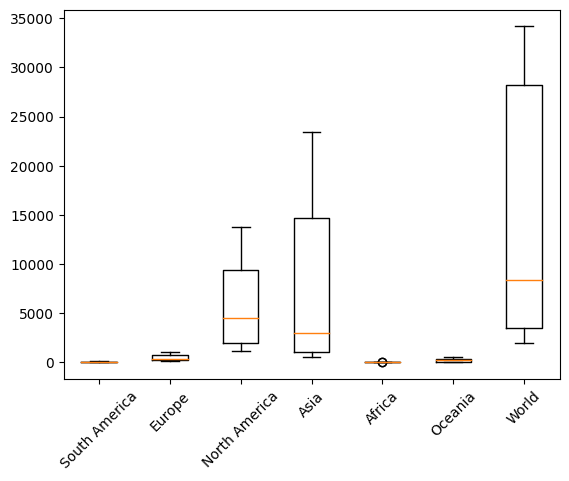

In [189]:
plt.figure()
_ = plt.boxplot(X, whis=1.5)
_ = plt.xticks(np.arange(len(X)) + 1, countries_by_continent.keys(), rotation=45)

the boxplot shows the median (called $Q_{2}$ or 50th quantile) in orange. The limits of the box correspond to the 1st and 3rd quartiles, i.e., $Q_{1}$ (25th quartile) and $Q_{3}$ (75th quartile). The __whiskers__ (i.e. lines exceeding the box) correspond to a range defined through the Inter Quartile Range (IQR). Roughly, the entire boxplot comprehends $Q_{1} - IQR * whis$ and $Q_{3} + IQR * whis$, where $whis=1.5$ is the argument in matplotlib's boxplot. Every value outside this range is treated as an outlier, and is plotted as an individual point.

### 2.4. Violin Plot

The violin plot is simillar to the Boxplot, but performs a [Kernel Density Estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) on top the values. This gives an idea of how data is distributed along the range of values,

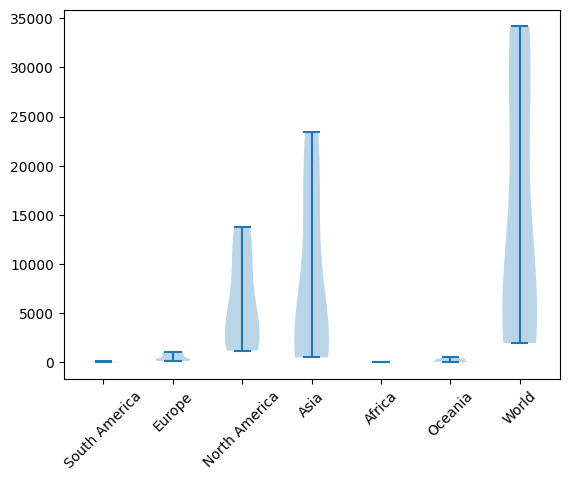

In [34]:
plt.figure()
_ = plt.violinplot(X)
_ = plt.xticks(np.arange(len(X)) + 1, countries_by_continent.keys(), rotation=45)

## 3. 2D Plotting

### 3.1. Scatter Plots

For this part of the lecture, we are going to reproduce charts about GDP per Capta vs. IDH and Augmented IDH. The original charts can be found [here (HDI)](https://ourworldindata.org/grapher/human-development-index-vs-gdp-per-capita) and [here (augmented HDI)](https://ourworldindata.org/grapher/augmented-hdi-vs-gdp-per-capita). Download the raw data, and place it in the data folder at the root of this repository.

We start by reading the HDI CSV,

In [3]:
df_hdi = pd.read_csv('../data/human-development-index-vs-gdp-per-capita.csv')
df_hdi.head(20)

Entity      Code  Year  Human Development Index  \
0      Abkhazia  OWID_ABK  2015                      NaN   
1   Afghanistan       AFG  1990                    0.273   
2   Afghanistan       AFG  1991                    0.279   
3   Afghanistan       AFG  1992                    0.287   
4   Afghanistan       AFG  1993                    0.297   
5   Afghanistan       AFG  1994                    0.292   
6   Afghanistan       AFG  1995                    0.310   
7   Afghanistan       AFG  1996                    0.319   
8   Afghanistan       AFG  1997                    0.323   
9   Afghanistan       AFG  1998                    0.324   
10  Afghanistan       AFG  1999                    0.332   
11  Afghanistan       AFG  2000                    0.335   
12  Afghanistan       AFG  2001                    0.337   
13  Afghanistan       AFG  2002                    0.362   
14  Afghanistan       AFG  2003                    0.376   
15  Afghanistan       AFG  2004                    0.392   
16  Afghanistan       AFG  2005                    0.400   
17  Afghanistan       AFG  2006                    0.409   
18  Afghanistan       AFG  2007                    0.424   
19  Afghanistan       AFG  2008                    0.430   

    GDP per capita, PPP (constant 2017 international $)  \
0                                                 NaN     
1                                                 NaN     
2                                                 NaN     
3                                                 NaN     
4                                                 NaN     
5                                                 NaN     
6                                                 NaN     
7                                                 NaN     
8                                                 NaN     
9                                                 NaN     
10                                                NaN     
11                                                NaN     
12                                                NaN     
13                                          1280.4631     
14                                          1292.3335     
15                                          1260.0605     
16                                          1352.3207     
17                                          1366.9932     
18                                          1528.3446     
19                                          1556.8445     

    Population (historical estimates) Continent  
0                                 NaN      Asia  
1                          10694804.0       NaN  
2                          10745168.0       NaN  
3                          12057436.0       NaN  
4                          14003764.0       NaN  
5                          15455560.0       NaN  
6                          16418911.0       NaN  
7                          17106600.0       NaN  
8                          17788818.0       NaN  
9                          18493134.0       NaN  
10                         19262854.0       NaN  
11                         19542986.0       NaN  
12                         19688634.0       NaN  
13                         21000258.0       NaN  
14                         22645136.0       NaN  
15                         23553554.0       NaN  
16                         24411196.0       NaN  
17                         25442946.0       NaN  
18                         25903306.0       NaN  
19                         26427204.0       NaN

Here, note that some values are __NaN__ (not a number). In some columns, we can partially remedy this issue by using the method ```fillna```, which uses a strategy to fill in NaN values. Here, we are going to fix the continent column using the "ffill" strategy. [According to Pandas documentation, it,](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

> propagate last valid observation forward to next valid.

In [4]:
df_hdi['Continent'] = df_hdi['Continent'].fillna(method='ffill')
display(df_hdi)

Entity      Code  Year  Human Development Index  \
0         Abkhazia  OWID_ABK  2015                      NaN   
1      Afghanistan       AFG  1990                    0.273   
2      Afghanistan       AFG  1991                    0.279   
3      Afghanistan       AFG  1992                    0.287   
4      Afghanistan       AFG  1993                    0.297   
...            ...       ...   ...                      ...   
58746     Zimbabwe       ZWE  1985                      NaN   
58747     Zimbabwe       ZWE  1986                      NaN   
58748     Zimbabwe       ZWE  1987                      NaN   
58749     Zimbabwe       ZWE  1988                      NaN   
58750     Zimbabwe       ZWE  1989                      NaN   

       GDP per capita, PPP (constant 2017 international $)  \
0                                                    NaN     
1                                                    NaN     
2                                                    NaN     
3                                                    NaN     
4                                                    NaN     
...                                                  ...     
58746                                                NaN     
58747                                                NaN     
58748                                                NaN     
58749                                                NaN     
58750                                                NaN     

       Population (historical estimates) Continent  
0                                    NaN      Asia  
1                             10694804.0      Asia  
2                             10745168.0      Asia  
3                             12057436.0      Asia  
4                             14003764.0      Asia  
...                                  ...       ...  
58746                          8690516.0    Africa  
58747                          8983048.0    Africa  
58748                          9277484.0    Africa  
58749                          9568745.0    Africa  
58750                          9846352.0    Africa  

[58751 rows x 7 columns]

In [5]:
df_hdi = df_hdi[df_hdi['Continent'] != 'Antarctica']

Next, note that the year column contains some strange entries,

In [6]:
df_hdi['Year'].unique()

array([  2015,   1990,   1991,   1992,   1993,   1994,   1995,   1996,
         1997,   1998,   1999,   2000,   2001,   2002,   2003,   2004,
         2005,   2006,   2007,   2008,   2009,   2010,   2011,   2012,
         2013,   2014,   2016,   2017,   2018,   2019,   2020,   2021,
       -10000,  -9000,  -8000,  -7000,  -6000,  -5000,  -4000,  -3000,
        -2000,  -1000,      0,    100,    200,    300,    400,    500,
          600,    700,    800,    900,   1000,   1100,   1200,   1300,
         1400,   1500,   1600,   1700,   1710,   1720,   1730,   1740,
         1750,   1760,   1770,   1780,   1790,   1800,   1801,   1802,
         1803,   1804,   1805,   1806,   1807,   1808,   1809,   1810,
         1811,   1812,   1813,   1814,   1815,   1816,   1817,   1818,
         1819,   1820,   1821,   1822,   1823,   1824,   1825,   1826,
         1827,   1828,   1829,   1830,   1831,   1832,   1833,   1834,
         1835,   1836,   1837,   1838,   1839,   1840,   1841,   1842,
      

Especially, we want to analyze the behavior for $year > 1990$, which gives us a nicer, much smaller table,

In [7]:
df_hdi = df_hdi[df_hdi['Year'] >= 1990]
df_hdi

Entity      Code  Year  Human Development Index  \
0         Abkhazia  OWID_ABK  2015                      NaN   
1      Afghanistan       AFG  1990                    0.273   
2      Afghanistan       AFG  1991                    0.279   
3      Afghanistan       AFG  1992                    0.287   
4      Afghanistan       AFG  1993                    0.297   
...            ...       ...   ...                      ...   
58519     Zimbabwe       ZWE  2017                    0.594   
58520     Zimbabwe       ZWE  2018                    0.602   
58521     Zimbabwe       ZWE  2019                    0.601   
58522     Zimbabwe       ZWE  2020                    0.600   
58523     Zimbabwe       ZWE  2021                    0.593   

       GDP per capita, PPP (constant 2017 international $)  \
0                                                    NaN     
1                                                    NaN     
2                                                    NaN     
3                                                    NaN     
4                                                    NaN     
...                                                  ...     
58519                                          2331.7808     
58520                                          2399.6216     
58521                                          2203.3967     
58522                                          1990.3195     
58523                                          2115.1445     

       Population (historical estimates) Continent  
0                                    NaN      Asia  
1                             10694804.0      Asia  
2                             10745168.0      Asia  
3                             12057436.0      Asia  
4                             14003764.0      Asia  
...                                  ...       ...  
58519                         14751101.0    Africa  
58520                         15052191.0    Africa  
58521                         15354606.0    Africa  
58522                         15669663.0    Africa  
58523                         15993525.0    Africa  

[8796 rows x 7 columns]

Before proceeding, note that the table contains somewhat heterogeneous data. Indeed, by checking the unique values of the Entity column, the table contains data about entities that are not countries (e.g., "East Asia and the Pacific (UNDP)"). We could remove these by hand (to be sure), or, we can note that these undesired entries have something between parenthesis in their names (like "(former)", or "(UNDP)"). We can exploit this to remove these values automatically,

In [8]:
df_hdi['Entity'].unique()

array(['Abkhazia', 'Afghanistan', 'Africa', 'Africa (UN)',
       'Akrotiri and Dhekelia', 'Aland Islands', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Arab States (UNDP)', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (UN)', 'Australia', 'Austria',
       'Austria-Hungary', 'Azerbaijan', 'Baden', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Bavaria', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Indian Ocean Territory',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Christmas Island',
       'Cocos Islands', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa R

In [9]:
to_exclude = [
    c for c in df_hdi['Entity'].unique() if "(" in c and ")" in c
]
print(to_exclude)

['Africa (UN)', 'Arab States (UNDP)', 'Asia (UN)', 'East Asia and Pacific (WB)', 'East Asia and the Pacific (UNDP)', 'Ethiopia (former)', 'Europe (UN)', 'Europe and Central Asia (UNDP)', 'Europe and Central Asia (WB)', 'European Union (27)', 'High human development (UNDP)', 'Korea (former)', 'Latin America and Caribbean (WB)', 'Latin America and the Caribbean (UN)', 'Latin America and the Caribbean (UNDP)', 'Low human development (UNDP)', 'Medium human development (UNDP)', 'Micronesia (country)', 'Middle East and North Africa (WB)', 'North America (WB)', 'Northern America (UN)', 'Oceania (UN)', 'Saint Martin (French part)', 'Sint Maarten (Dutch part)', 'South Asia (UNDP)', 'South Asia (WB)', 'Sub-Saharan Africa (UNDP)', 'Sub-Saharan Africa (WB)', 'Very high human development (UNDP)']


In [10]:
ind = [c not in to_exclude for c in df_hdi['Entity'].values]
df_hdi = df_hdi[ind]

In [11]:
df_hdi['Entity'].unique()

array(['Abkhazia', 'Afghanistan', 'Africa', 'Akrotiri and Dhekelia',
       'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Austria-Hungary', 'Azerbaijan', 'Baden', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Bavaria', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Indian Ocean Territory',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad',
       'Channel Islands', 'Chile', 'China', 'Christmas Island',
       'Cocos Islands', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
    

Next, we are going to scatter countries by in terms of their GDP (x-axis) and HDI (y-axis). For reference, we are going to take the min and max of each of these variables,

In [12]:
min_hdi = np.nanmin(df_hdi['Human Development Index'])
max_hdi = np.nanmax(df_hdi['Human Development Index'])

min_gdp = np.nanmin(df_hdi['GDP per capita, PPP (constant 2017 international $)'])
max_gdp = np.nanmax(df_hdi['GDP per capita, PPP (constant 2017 international $)'])

print(f"HDI ∈ [{min_hdi}, {max_hdi}]")
print(f"GDP ∈ [{min_gdp}, {max_gdp}]")

HDI ∈ [0.216, 0.962]
GDP ∈ [436.3764, 157602.48]


We can visualize the evolution over the years with a single scatter plot,

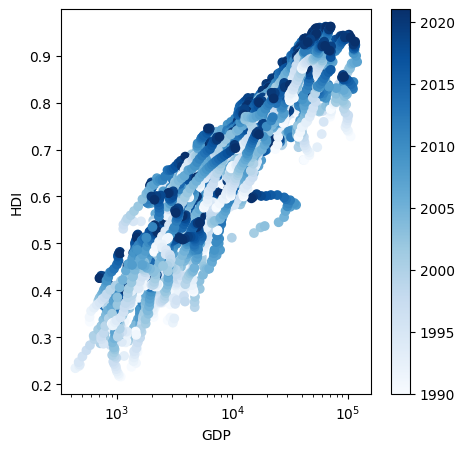

In [14]:
figure = plt.figure(figsize=(5, 5))

scatter = plt.scatter(
    x=df_hdi['GDP per capita, PPP (constant 2017 international $)'],
    y=df_hdi['Human Development Index'],
    c=df_hdi['Year'],
    vmin=1990,
    vmax=2021,
    cmap='Blues'
)
plt.xlabel('GDP')
plt.ylabel('HDI')
figure.colorbar(scatter)
plt.xscale('log')

which is somewhat insightful. Note that as years progress (white towards blue), most countries progress in terms of HDI and GDP. Also, note that HDI is fairly correlated with GDP. This is not surprising, since the [HDI takes the GNI](https://en.wikipedia.org/wiki/Human_Development_Index) (which is somewhat related to the GDP) into acount when calculating a country's index.

Next, let's take a snapshot at 2015. We want to scatter points with colors depending on the continent,,

In [15]:
continent_to_index = {c: i for i, c in enumerate(df_hdi['Continent'].unique())}
print(continent_to_index)

{'Asia': 0, 'Europe': 1, 'Africa': 2, 'Oceania': 3, 'North America': 4, 'South America': 5}


__Note.__ As is, we cannot add a legend to the figure. To do so, we need to loop over continents and add a label to each scatter plot,

In [24]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']

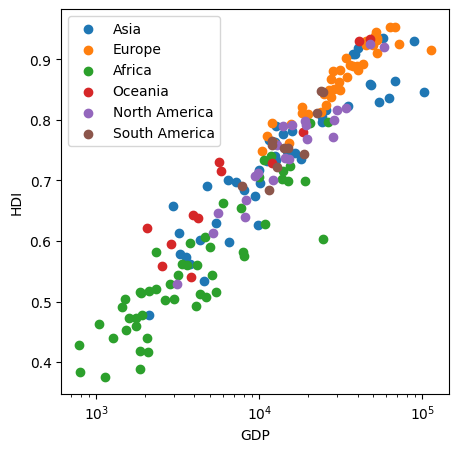

In [42]:
plt.figure(figsize=(5, 5))
cmap = plt.cm.tab10

df_hdi_filtered = df_hdi[df_hdi['Year'] == 2015]

for continent in continent_to_index:
    df_hdi_continent = df_hdi_filtered[df_hdi_filtered['Continent'] == continent]
    
    plt.scatter(
        x=df_hdi_continent['GDP per capita, PPP (constant 2017 international $)'],
        y=df_hdi_continent['Human Development Index'],
        c=colors[continent_to_index[continent]],
        label=continent
    )
plt.legend()
plt.xlabel('GDP')
plt.ylabel('HDI')
plt.xscale('log')

In [39]:
frames = []

for year in range(1990, 2022):
    current_year_ind = np.where(df_hdi['Year'] == year)[0]
    df_curr_year = df_hdi.iloc[current_year_ind]
    
    frames.append(
        (np.concatenate([
            df_curr_year['Human Development Index'].values[:, None],
            df_curr_year['GDP per capita, PPP (constant 2017 international $)'].values[:, None]
        ], axis=1), year)
    )

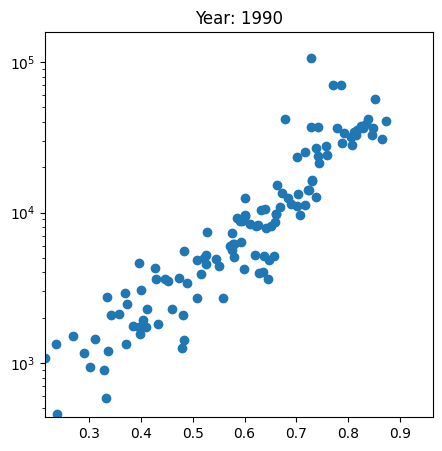

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

def update(frame):
    arr, year = frame
    
    global ax
    ax.clear()
    ax.scatter(arr[:, 0], arr[:, 1])
    ax.set_yscale('log')
    ax.set_xlim([min_hdi, max_hdi])
    ax.set_ylim([min_gdp, max_gdp])
    ax.set_title(f'Year: {year}')
    
anim = FuncAnimation(fig, update, frames=frames, interval=30)
HTML(anim.to_jshtml())

In [57]:
df_hdi_aug = pd.read_csv('../data/augmented-hdi-vs-gdp-per-capita.csv')
df_hdi_aug

Entity      Code  Year  Augmented Human Development Index (AHDI)  \
0         Abkhazia  OWID_ABK  2015                                       NaN   
1      Afghanistan       AFG  1950                                  0.050043   
2      Afghanistan       AFG  1955                                  0.053487   
3      Afghanistan       AFG  1960                                  0.058654   
4      Afghanistan       AFG  1965                                  0.068907   
...            ...       ...   ...                                       ...   
62400     Zimbabwe       ZWE  1947                                       NaN   
62401     Zimbabwe       ZWE  1948                                       NaN   
62402     Zimbabwe       ZWE  1949                                       NaN   
62403     Zimbabwe       ZWE  2019                                       NaN   
62404     Zimbabwe       ZWE  2021                                       NaN   

      814486-annotations  GDP per capita 417485-annotations  \
0                    NaN             NaN                NaN   
1                    NaN          1156.0                NaN   
2                    NaN          1246.0                NaN   
3                    NaN          1326.0                NaN   
4                    NaN          1290.0                NaN   
...                  ...             ...                ...   
62400                NaN             NaN                NaN   
62401                NaN             NaN                NaN   
62402                NaN             NaN                NaN   
62403                NaN             NaN                NaN   
62404                NaN             NaN                NaN   

       Population (historical estimates) Continent  
0                                    NaN      Asia  
1                              7480464.0       NaN  
2                              7971933.0       NaN  
3                              8622473.0       NaN  
4                              9565154.0       NaN  
...                                  ...       ...  
62400                          2616729.0       NaN  
62401                          2666945.0       NaN  
62402                          2725021.0       NaN  
62403                         15354606.0       NaN  
62404                         15993525.0       NaN  

[62405 rows x 9 columns]

In [58]:
df_hdi_aug = df_hdi_aug[df_hdi_aug['Year'] >= 1990]
df_hdi_aug

Entity      Code  Year  Augmented Human Development Index (AHDI)  \
0         Abkhazia  OWID_ABK  2015                                       NaN   
9      Afghanistan       AFG  1990                                  0.092451   
10     Afghanistan       AFG  1995                                  0.079803   
11     Afghanistan       AFG  2000                                  0.082463   
12     Afghanistan       AFG  2005                                  0.148921   
...            ...       ...   ...                                       ...   
62222     Zimbabwe       ZWE  2016                                       NaN   
62223     Zimbabwe       ZWE  2017                                       NaN   
62224     Zimbabwe       ZWE  2018                                       NaN   
62403     Zimbabwe       ZWE  2019                                       NaN   
62404     Zimbabwe       ZWE  2021                                       NaN   

      814486-annotations  GDP per capita 417485-annotations  \
0                    NaN             NaN                NaN   
9                    NaN        963.0000                NaN   
10                   NaN        632.9404                NaN   
11                   NaN        502.3727                NaN   
12                   NaN        964.4081                NaN   
...                  ...             ...                ...   
62222                NaN       1534.0000                NaN   
62223                NaN       1582.3662                NaN   
62224                NaN       1611.4052                NaN   
62403                NaN             NaN                NaN   
62404                NaN             NaN                NaN   

       Population (historical estimates) Continent  
0                                    NaN      Asia  
9                             10694804.0       NaN  
10                            16418911.0       NaN  
11                            19542986.0       NaN  
12                            24411196.0       NaN  
...                                  ...       ...  
62222                         14452705.0       NaN  
62223                         14751101.0       NaN  
62224                         15052191.0       NaN  
62403                         15354606.0       NaN  
62404                         15993525.0       NaN  

[8483 rows x 9 columns]

In [59]:
df_hdi_aug[df_hdi_aug['Year'] == 2021]

Entity      Code  Year  \
259       Afghanistan       AFG  2021   
518            Africa       NaN  2021   
590       Africa (UN)       NaN  2021   
854           Albania       ALB  2021   
1113          Algeria       DZA  2021   
...               ...       ...   ...   
61170  Western Sahara       ESH  2021   
61474           World  OWID_WRL  2021   
61734           Yemen       YEM  2021   
62144          Zambia       ZMB  2021   
62404        Zimbabwe       ZWE  2021   

       Augmented Human Development Index (AHDI) 814486-annotations  \
259                                         NaN                NaN   
518                                         NaN                NaN   
590                                         NaN                NaN   
854                                         NaN                NaN   
1113                                        NaN                NaN   
...                                         ...                ...   
61170                                       NaN                NaN   
61474                                       NaN                NaN   
61734                                       NaN                NaN   
62144                                       NaN                NaN   
62404                                       NaN                NaN   

       GDP per capita 417485-annotations  Population (historical estimates)  \
259               NaN                NaN                       4.009946e+07   
518               NaN                NaN                       1.393677e+09   
590               NaN                NaN                       1.393676e+09   
854               NaN                NaN                       2.854710e+06   
1113              NaN                NaN                       4.417796e+07   
...               ...                ...                                ...   
61170             NaN                NaN                       5.655900e+05   
61474             NaN                NaN                       7.909295e+09   
61734             NaN                NaN                       3.298164e+07   
62144             NaN                NaN                       1.947313e+07   
62404             NaN                NaN                       1.599352e+07   

      Continent  
259         NaN  
518         NaN  
590         NaN  
854         NaN  
1113        NaN  
...         ...  
61170       NaN  
61474       NaN  
61734       NaN  
62144       NaN  
62404       NaN  

[254 rows x 9 columns]

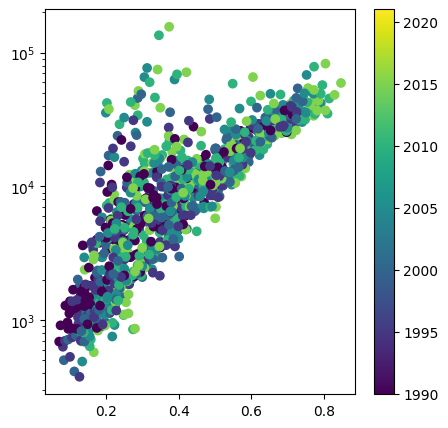

In [60]:
figure = plt.figure(figsize=(5, 5))

scatter = plt.scatter(x=df_idh_aug['Augmented Human Development Index (AHDI)'],
            y=df_hdi_aug['GDP per capita'],
            c=df_hdi_aug['Year'],
            vmin=1990,
            vmax=2021)
figure.colorbar(scatter)
plt.yscale('log')

In [61]:
frames = []

for year in range(1990, 2022):
    current_year_ind = np.where(df_idh_aug['Year'] == year)[0]
    df_curr_year = df_idh_aug.iloc[current_year_ind]
    all_null = (
        df_curr_year['Augmented Human Development Index (AHDI)'].isnull().all() or
        df_curr_year['GDP per capita'].isnull().all()
    )
    
    if not all_null:
        frames.append(
            (np.concatenate([
                df_curr_year['GDP per capita'].values[:, None],
                df_curr_year['Augmented Human Development Index (AHDI)'].values[:, None]
            ], axis=1), year)
        )

In [62]:
min_hdi = np.nanmin(df_idh_aug['Augmented Human Development Index (AHDI)'])
max_hdi = np.nanmax(df_idh_aug['Augmented Human Development Index (AHDI)'])

min_gdp = np.nanmin(df_idh_aug['GDP per capita'])
max_gdp = np.nanmax(df_idh_aug['GDP per capita'])

print(f"HDI ∈ [{min_hdi}, {max_hdi}]")
print(f"GDP ∈ [{min_gdp}, {max_gdp}]")

HDI ∈ [0.06952051, 0.88554484]
GDP ∈ [377.5801, 156299.0]


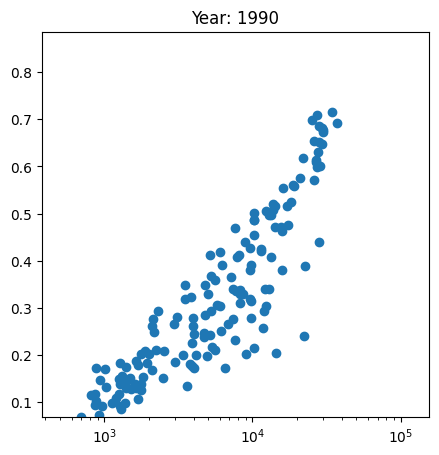

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

def update(frame):
    arr, year = frame
    
    global ax
    ax.clear()
    ax.scatter(arr[:, 0], arr[:, 1])
    ax.set_xscale('log')
    ax.set_xlim([min_gdp, max_gdp])
    ax.set_ylim([min_hdi, max_hdi])
    ax.set_title(f'Year: {year}')
    
anim = FuncAnimation(fig, update, frames=frames, interval=30)
HTML(anim.to_jshtml())

In [65]:
df_merge = pd.merge(df_hdi, df_hdi_aug, on=['Entity', 'Year'], how='inner')
df_merge

Entity    Code_x  Year  Human Development Index  \
0        Abkhazia  OWID_ABK  2015                      NaN   
1     Afghanistan       AFG  1990                    0.273   
2     Afghanistan       AFG  1991                    0.279   
3     Afghanistan       AFG  1992                    0.287   
4     Afghanistan       AFG  1993                    0.297   
...           ...       ...   ...                      ...   
7861     Zimbabwe       ZWE  2017                    0.594   
7862     Zimbabwe       ZWE  2018                    0.602   
7863     Zimbabwe       ZWE  2019                    0.601   
7864     Zimbabwe       ZWE  2020                    0.600   
7865     Zimbabwe       ZWE  2021                    0.593   

      GDP per capita, PPP (constant 2017 international $)  \
0                                                   NaN     
1                                                   NaN     
2                                                   NaN     
3                                                   NaN     
4                                                   NaN     
...                                                 ...     
7861                                          2331.7808     
7862                                          2399.6216     
7863                                          2203.3967     
7864                                          1990.3195     
7865                                          2115.1445     

      Population (historical estimates)_x Continent_x    Code_y  \
0                                     NaN        Asia  OWID_ABK   
1                              10694804.0        Asia       AFG   
2                              10745168.0        Asia       AFG   
3                              12057436.0        Asia       AFG   
4                              14003764.0        Asia       AFG   
...                                   ...         ...       ...   
7861                           14751101.0      Africa       ZWE   
7862                           15052191.0      Africa       ZWE   
7863                           15354606.0      Africa       ZWE   
7864                           15669663.0      Africa       ZWE   
7865                           15993525.0      Africa       ZWE   

      Augmented Human Development Index (AHDI) 814486-annotations  \
0                                          NaN                NaN   
1                                     0.092451                NaN   
2                                          NaN                NaN   
3                                          NaN                NaN   
4                                          NaN                NaN   
...                                        ...                ...   
7861                                       NaN                NaN   
7862                                       NaN                NaN   
7863                                       NaN                NaN   
7864                                  0.268762                NaN   
7865                                       NaN                NaN   

      GDP per capita 417485-annotations  Population (historical estimates)_y  \
0                NaN                NaN                                  NaN   
1           963.0000                NaN                           10694804.0   
2           881.1704                NaN                           10745168.0   
3           843.8753                NaN                           12057436.0   
4           578.4027                NaN                           14003764.0   
...              ...                ...                                  ...   
7861       1582.3662                NaN                           14751101.0   
7862       1611.4052                NaN                           15052191.0   
7863             NaN                NaN                           15354606.0   
7864             NaN                NaN                           15669663.0   
7865             Na

In [66]:
columns = list(df_merge.columns)
columns_to_drop = [c for c in columns if '_x' in c or '_y' in c]
columns_to_drop += ['814486-annotations', '417485-annotations']
print(columns_to_drop)

['Code_x', 'Population (historical estimates)_x', 'Continent_x', 'Code_y', 'Population (historical estimates)_y', 'Continent_y', '814486-annotations', '417485-annotations']


In [67]:
df_merge = df_merge.drop(labels=columns_to_drop, axis=1)

In [68]:
df_merge

Entity  Year  Human Development Index  \
0        Abkhazia  2015                      NaN   
1     Afghanistan  1990                    0.273   
2     Afghanistan  1991                    0.279   
3     Afghanistan  1992                    0.287   
4     Afghanistan  1993                    0.297   
...           ...   ...                      ...   
7861     Zimbabwe  2017                    0.594   
7862     Zimbabwe  2018                    0.602   
7863     Zimbabwe  2019                    0.601   
7864     Zimbabwe  2020                    0.600   
7865     Zimbabwe  2021                    0.593   

      GDP per capita, PPP (constant 2017 international $)  \
0                                                   NaN     
1                                                   NaN     
2                                                   NaN     
3                                                   NaN     
4                                                   NaN     
...                                                 ...     
7861                                          2331.7808     
7862                                          2399.6216     
7863                                          2203.3967     
7864                                          1990.3195     
7865                                          2115.1445     

      Augmented Human Development Index (AHDI)  GDP per capita  
0                                          NaN             NaN  
1                                     0.092451        963.0000  
2                                          NaN        881.1704  
3                                          NaN        843.8753  
4                                          NaN        578.4027  
...                                        ...             ...  
7861                                       NaN       1582.3662  
7862                                       NaN       1611.4052  
7863                                       NaN             NaN  
7864                                  0.268762             NaN  
7865                                       NaN             NaN  

[7866 rows x 6 columns]

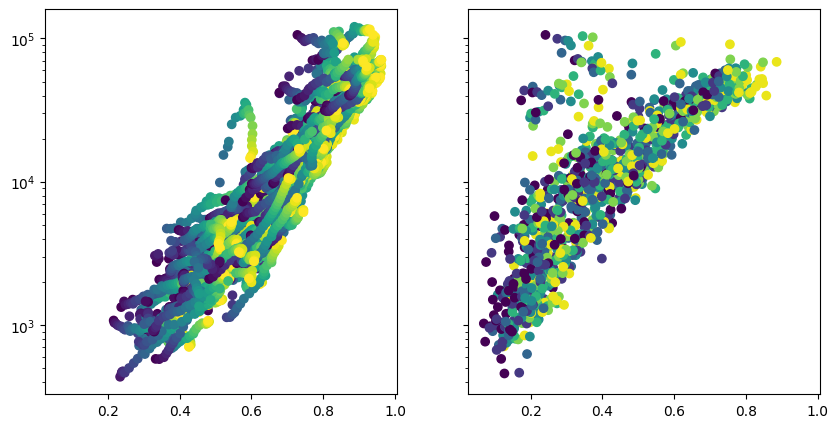

In [69]:
figure, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

scatter = axes[0].scatter(x=df_merge['Human Development Index'],
            y=df_merge['GDP per capita, PPP (constant 2017 international $)'],
            c=df_merge['Year'],
            vmin=1990,
            vmax=2021)
axes[0].set_yscale('log')
scatter = axes[1].scatter(x=df_merge['Augmented Human Development Index (AHDI)'],
            y=df_merge['GDP per capita, PPP (constant 2017 international $)'],
            c=df_merge['Year'],
            vmin=1990,
            vmax=2021)
axes[1].set_yscale('log')

In [70]:
df_merge

Entity  Year  Human Development Index  \
0        Abkhazia  2015                      NaN   
1     Afghanistan  1990                    0.273   
2     Afghanistan  1991                    0.279   
3     Afghanistan  1992                    0.287   
4     Afghanistan  1993                    0.297   
...           ...   ...                      ...   
7861     Zimbabwe  2017                    0.594   
7862     Zimbabwe  2018                    0.602   
7863     Zimbabwe  2019                    0.601   
7864     Zimbabwe  2020                    0.600   
7865     Zimbabwe  2021                    0.593   

      GDP per capita, PPP (constant 2017 international $)  \
0                                                   NaN     
1                                                   NaN     
2                                                   NaN     
3                                                   NaN     
4                                                   NaN     
...                                                 ...     
7861                                          2331.7808     
7862                                          2399.6216     
7863                                          2203.3967     
7864                                          1990.3195     
7865                                          2115.1445     

      Augmented Human Development Index (AHDI)  GDP per capita  
0                                          NaN             NaN  
1                                     0.092451        963.0000  
2                                          NaN        881.1704  
3                                          NaN        843.8753  
4                                          NaN        578.4027  
...                                        ...             ...  
7861                                       NaN       1582.3662  
7862                                       NaN       1611.4052  
7863                                       NaN             NaN  
7864                                  0.268762             NaN  
7865                                       NaN             NaN  

[7866 rows x 6 columns]

In [71]:
min_hdi = np.nanmin(df_merge['Human Development Index'])
max_hdi = np.nanmax(df_merge['Human Development Index'])

min_hdi_aug = np.nanmin(df_merge['Augmented Human Development Index (AHDI)'])
max_hdi_aug = np.nanmax(df_merge['Augmented Human Development Index (AHDI)'])

min_gdp = np.nanmin(df_merge['GDP per capita'])
max_gdp = np.nanmax(df_merge['GDP per capita'])

print(f"HDI ∈ [{min_hdi}, {max_hdi}]")
print(f"HDI_aug ∈ [{min_hdi_aug}, {max_hdi_aug}]")
print(f"GDP ∈ [{min_gdp}, {max_gdp}]")

xmin, xmax = min_gdp, max_gdp
ymin, ymax = np.amin([min_hdi, min_hdi_aug]), np.amax([max_hdi, max_hdi_aug])

print(f"X-axis limits: [{xmin}, {xmax}], Y-axis limits: [{ymin}, {ymax}]")

HDI ∈ [0.216, 0.962]
HDI_aug ∈ [0.06952051, 0.88554484]
GDP ∈ [377.5801, 156299.0]
X-axis limits: [377.5801, 156299.0], Y-axis limits: [0.06952051, 0.962]


In [72]:
frames = []

for year in range(1990, 2022, 5):
    current_year_ind = np.where(df_merge['Year'] == year)[0]
    df_curr_year = df_merge.iloc[current_year_ind]
    
    arr_hdi = np.concatenate([
        df_curr_year['GDP per capita, PPP (constant 2017 international $)'].values[:, None],
        df_curr_year['Human Development Index'].values[:, None],
    ], axis=1)
    
    arr_hdi_aug = np.concatenate([
        df_curr_year['GDP per capita, PPP (constant 2017 international $)'].values[:, None],
        df_curr_year['Augmented Human Development Index (AHDI)'].values[:, None],
    ], axis=1)
    
    frames.append(
        (arr_hdi, arr_hdi_aug, year)
    )

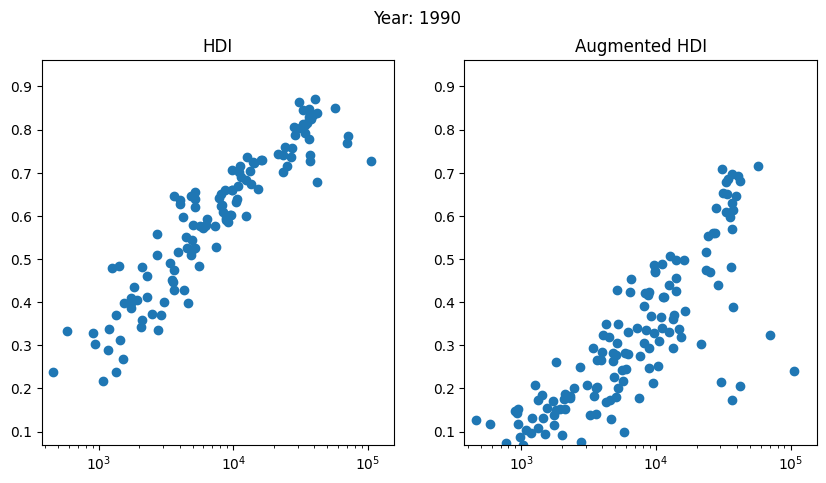

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

def update(frame):
    arr, arr_aug, year = frame
    
    global axes
    
    for ax in axes:
        ax.clear()

    axes[0].scatter(arr[:, 0], arr[:, 1])
    axes[0].set_xscale('log')
    axes[0].set_xlim([xmin, xmax])
    axes[0].set_ylim([ymin, ymax])
    axes[0].set_title('HDI')
    
    axes[1].scatter(arr_aug[:, 0], arr_aug[:, 1])
    axes[1].set_xscale('log')
    axes[1].set_xlim([xmin, xmax])
    axes[1].set_ylim([ymin, ymax])
    axes[1].set_title('Augmented HDI')
    
    plt.suptitle(f'Year: {year}')
    
anim = FuncAnimation(fig, update, frames=frames, interval=30)
HTML(anim.to_jshtml())

### 3.2. Imshow

The [__imshow__](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) is used for displaying image data. Before going over how imshow works, let us briefly define images.

__A gray-scale image__ is a matrix $\mathbf{A} \in \mathbb{R}^{h \times w}$, where $h$ denotes its height, and $w$ denotes its width. $h$ corresponds to how many rows $\mathbf{A}$ has, whereas $w$ corresponds to how many columns. A __pixel__ is an entry $A_{ij}$ of the matrix. As such, a gray-scale image is said to have $hw$ pixels.

The entries of $A_{ij}$ can be encoded in various ways. The canonical encoding for images is as 8-bit unsigned integers, that is, $A_{ij} \in [0, 1, \cdots, 255]$. These values are encoded in such a way that $0$ corresponds to black, and $255$ to white. The intermediate values interpolate between these two colors (thus, they represent a __gray__ scale). Note that __this is completely arbitrary__, as you could assign $0$ and $255$ to any two colours and interpolate between them. Furthermore, one may encode $A_{ij}$ with any amount of bits. A second usual way is using 32-bit floating point. In this case, $A_{ij} \in [0, 1]$ with 32-bit precision.

Based on these ideas, let us re-consider the image used in the last practical session,

In [127]:
n = 300

u0 = np.zeros([n, n]).astype(np.uint8)
cx1, cy1 = 1 * n // 3, 1 * n // 3
cx2, cy2 = 2 * n // 3, 2 * n // 3
r1, r2 = 20, 30

for i in range(n):
    for j in range(n):
        c1 = np.array([cx1, cy1])
        c2 = np.array([cx2, cy2])
        p = np.array([i, j])

        if np.linalg.norm(c1 - p) <= r1:
            u0[i, j] = 255
        elif np.linalg.norm(c2 - p) <= r2:
            u0[i, j] = 255

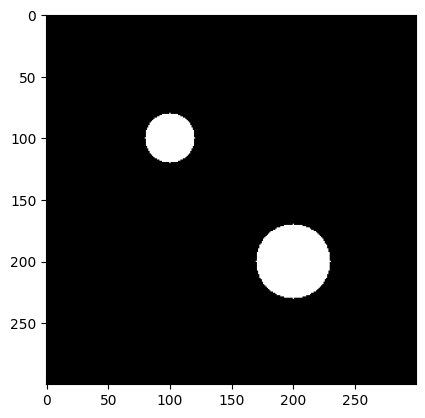

In [128]:
plt.imshow(u0, cmap='gray')

Text(0.5, 1.0, 'Spectral')

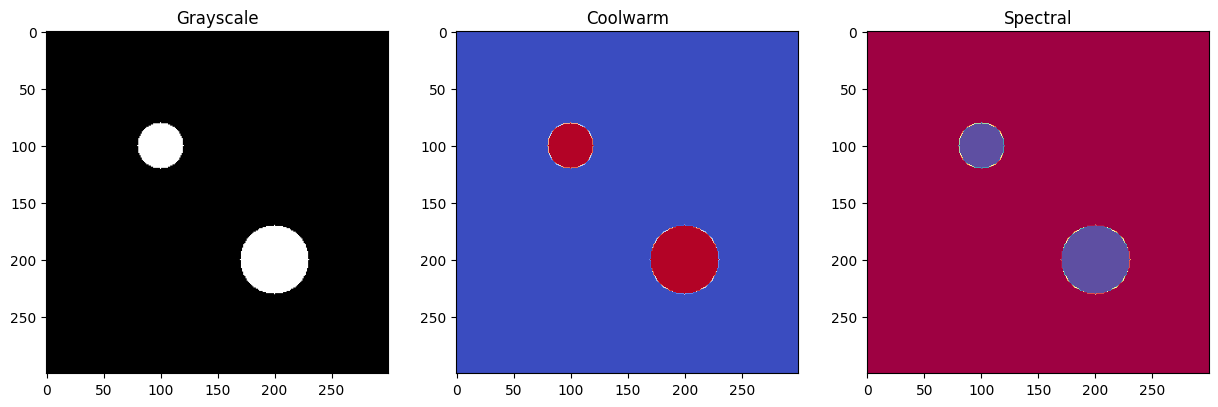

In [131]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(u0, cmap='gray')
axes[0].set_title('Grayscale')
axes[1].imshow(u0, cmap='coolwarm')
axes[1].set_title('Coolwarm')
axes[2].imshow(u0, cmap='Spectral')
axes[2].set_title('Spectral')

for colored images, things become slightly more complex since the computer needs to use number to represent colors. In this case, one uses [__color channels__](https://en.wikipedia.org/wiki/Channel_(digital_image)), which represent colors as combinations of primary colors. The canonical color channels are Red-Blue-Green (RGB). As such, color images are represented a 3-D array $\mathbf{A} \in \mathbb{R}^{h\times w \times c}$, where $c = 3$. A pixel is an entry $A_{ij} = (A_{ij0}, A_{ij1}, A_{ij2}) \in \mathbb{R}^{3}$ of $R$, $G$ and $B$ intensities. The idea is that each channel represents the intensity of its respective color. Again, $A_{ijk}$ can be encoded as 8-bit unsigned integer or 32-bit float.

In [134]:
im = data.astronaut()
print(im.shape, im.dtype)

(512, 512, 3) uint8


(-0.5, 511.5, 511.5, -0.5)

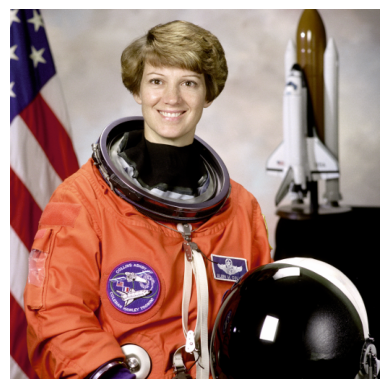

In [152]:
plt.imshow(im)
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

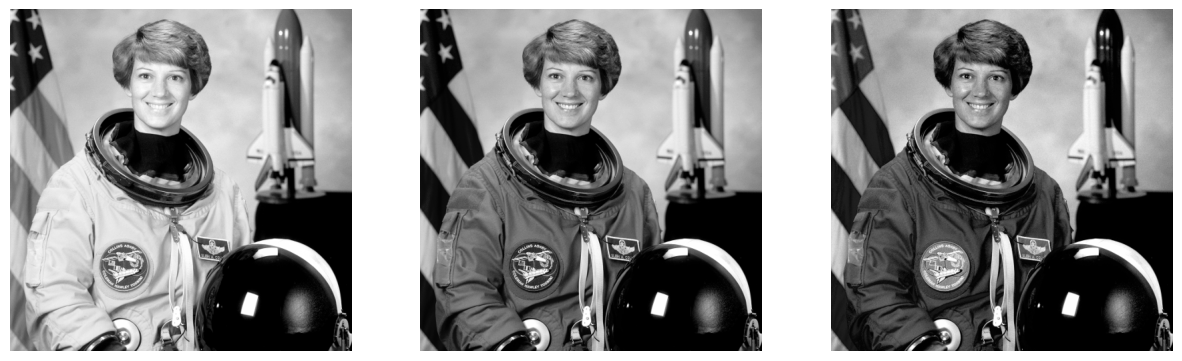

In [151]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(im[:, :, 0], cmap='gray', vmin=0, vmax=255)
axes[0].axis('off')
axes[1].imshow(im[:, :, 1], cmap='gray', vmin=0, vmax=255)
axes[1].axis('off')
axes[2].imshow(im[:, :, 2], cmap='gray', vmin=0, vmax=255)
axes[2].axis('off')

__Note.__ The conversion from RGB to Gray-Scale __is not__ a simple average. Actually, when you want to convert between the two formats, you want to __extract the intensity__ of the RGB pixel. Since the human eye reacts differently to red, blue and green, this interaction needs to be taken into account. As a result,

$$A_{ij} = 0.299A_{ij0} + 0.587A_{ij1} + 0.114A_{ij2}$$

where $A_{ij}$ corresponds to the pixel in grayscale.

In [147]:
im_avg = im.mean(axis=-1)
im_grayscale = 0.299 * im[..., 0] + 0.587 * im[..., 1] + 0.114 * im[..., 2]

(-0.5, 511.5, 511.5, -0.5)

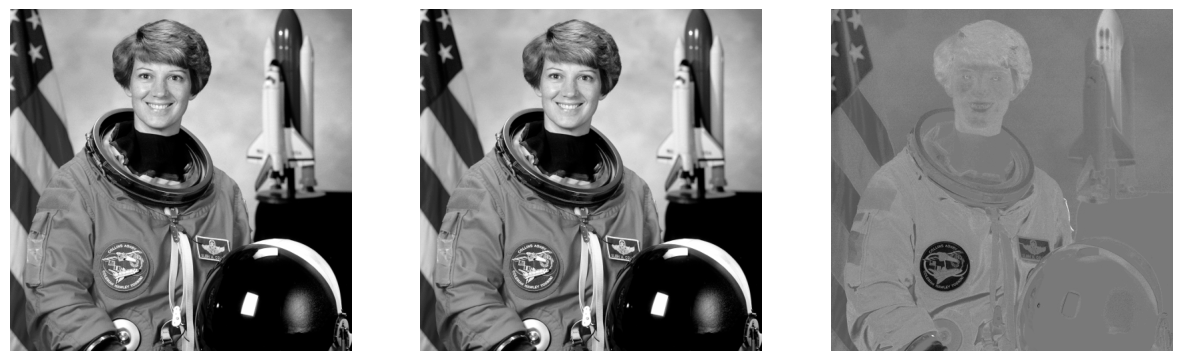

In [150]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(im_avg, cmap='gray')
axes[0].axis('off')
axes[1].imshow(im_grayscale, cmap='gray')
axes[1].axis('off')
axes[2].imshow(im_grayscale - im_avg, cmap='gray')
axes[2].axis('off')

### Interlude

From now on, let us focus on mathematics. Contours, heatmaps and surfaces will be used for visualizing scalar fields, i.e., funcitons $f:\mathbb{R}^{d}\rightarrow\mathbb{R}$. In these cases, $d = 2$, otherwise we would not be able to visualize it.

For quiver plots, we are rather interested with vector fields $\mathbf{F}:\mathbb{R}^{d} \rightarrow \mathbb{R}^{d}$, $d=2$, where to each vector $\mathbf{x} \in \mathbb{R}^{2}$ we visualize $\mathbf{F}(\mathbf{x}) \in \mathbb{R}^{d}$ as an arrow between $\mathbf{x}$ and $\mathbf{F}(\mathbf{x})$.

Henceforth, we will work on a grid over the plane $\mathbb{R}^{2}$. This grid is constructed through the function [__np.meshgrid__](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html). The meshgrid function takes as input two arrays of size $(n,)$ and $(m,)$ and outputs two arrays $(n,m)$ and $(n,m)$ defined as follows,

$$X_{ij} = x_{i}\text{ for }i=1,\cdots,n\text{ and }j=1,\cdots,m$$

and

$$Y_{ij} = y_{j}\text{ for }i=1,\cdots,n\text{ and }j=1,\cdots,m$$

Let us give a simple example,

In [155]:
x = np.linspace(-4, 4, 9)
y = np.linspace(-5, 5, 11)

print(x)
print(y)

[-4. -3. -2. -1.  0.  1.  2.  3.  4.]
[-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


In [157]:
X, Y = np.meshgrid(x, y)

print(X.shape, Y.shape)

(11, 9) (11, 9)


In [158]:
X

array([[-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]])

In [159]:
Y

array([[-5., -5., -5., -5., -5., -5., -5., -5., -5.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-3., -3., -3., -3., -3., -3., -3., -3., -3.],
       [-2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.]])

In [162]:
points = np.stack([np.array([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])
print(points.shape)

(99, 2)


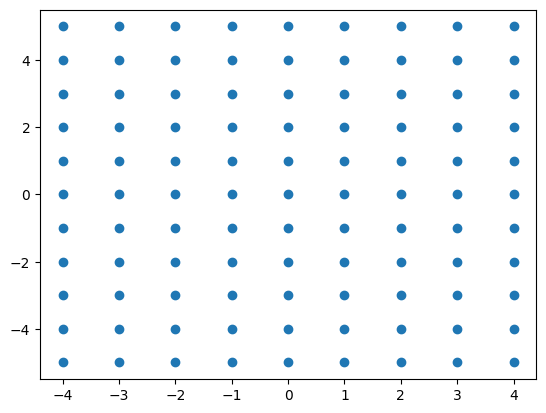

In [163]:
plt.scatter(points[:, 0], points[:, 1])

for the most of the functions in the next examples, you need to compute $z_{ij} = f(\mathbf{x}_{i}, \mathbf{y}_{j})$ on each pair $(\mathbf{x}_{i}, \mathbf{y}_{j})$ shown above.

### 3.3. Contours

__Def (Level Sets).__ For a function $f:\mathbb{R}^{d} \rightarrow \mathbb{R}$ and a scalar $\alpha$, the level set of $f$ is defined as the set: $L_{c}(\alpha) = \{\mathbf{x} \in \mathbb{R}^{d}\text{ s.t. }f(\mathbf{x})=\alpha\}$

A [__countour plot__](https://en.wikipedia.org/wiki/Contour_line) plots the level sets $L_{\alpha_{i}}(f)$ for a range of values $\alpha_{1},\cdots,\alpha_{n}$.

In [167]:
def f(x, y):
    return np.sin(x) + np.cos(y)

In [175]:
# Horizontal range
x = np.linspace(-5, 5, 21)

# Vertical range
y = np.linspace(-5, 5, 21)

# Meshgrid
X, Y = np.meshgrid(x, y)

# Points for evaluating f
pts = np.stack([np.array([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])

# Values z_ij = f(x_i, y_j)
values = f(pts[:, 0], pts[:, 1])

# Reshape into the shape of X
Z = values.reshape(*X.shape)

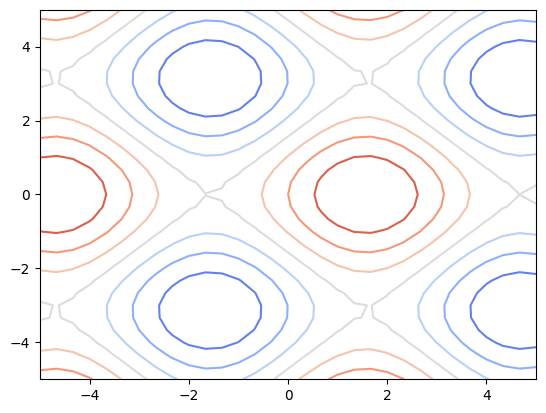

In [250]:
plt.figure()
plt.contour(X, Y, Z, cmap=plt.cm.coolwarm)

__Note.__ It may be useful to label the level sets of $f$ for better visualization. This can be done with the clabel function,

<a list of 30 text.Text objects>

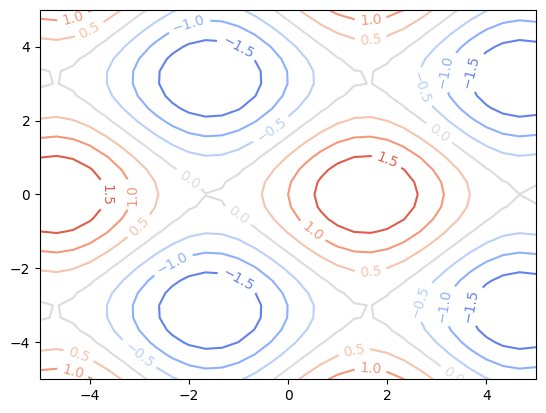

In [249]:
plt.figure()
cs = plt.contour(X, Y, Z, cmap=plt.cm.coolwarm)
plt.clabel(cs)

### 3.4. Heatmaps

A [heatmap](https://en.wikipedia.org/wiki/Heat_map) is a 2-D data visualization technique that represents intensities over the plane with colors. Note that you can use the __imshow__ function for doing so. In this section we are going to explore the [colormesh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html) function instead. The syntax of the function is similar to that of __contour__,

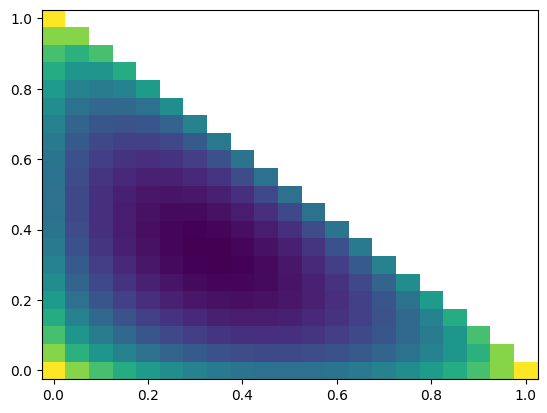

In [305]:
plt.figure()
plt.pcolormesh(X, Y, Z)

note that this generate a __pixelated__ output. This is due the number of points chosen in the grid. Let us repeat the calculations for an increasing number of points,

Text(0.5, 1.0, 'N points = 31')

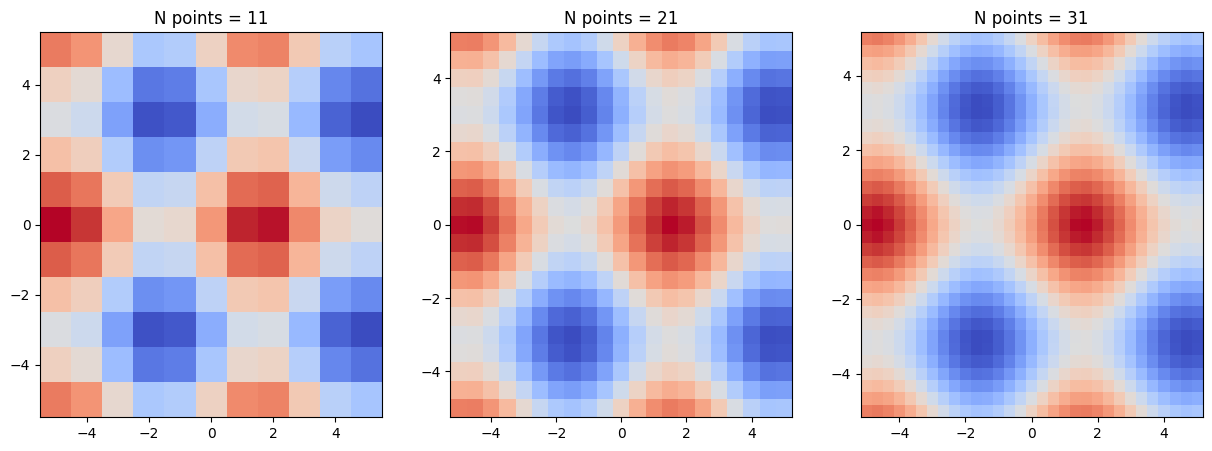

In [306]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


# Horizontal range
x = np.linspace(-5, 5, 11)

# Vertical range
y = np.linspace(-5, 5, 11)

# Meshgrid
X, Y = np.meshgrid(x, y)

# Points for evaluating f
pts = np.stack([np.array([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])

# Values z_ij = f(x_i, y_j)
values = f(pts[:, 0], pts[:, 1])

# Reshape into the shape of X
Z = values.reshape(*X.shape)

# Plot for 11 values
axes[0].pcolormesh(X, Y, Z, cmap=plt.cm.coolwarm)
axes[0].set_title('N points = 11')

# Horizontal range
x = np.linspace(-5, 5, 21)

# Vertical range
y = np.linspace(-5, 5, 21)

# Meshgrid
X, Y = np.meshgrid(x, y)

# Points for evaluating f
pts = np.stack([np.array([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])

# Values z_ij = f(x_i, y_j)
values = f(pts[:, 0], pts[:, 1])

# Reshape into the shape of X
Z = values.reshape(*X.shape)

# Plot for 21 values
axes[1].pcolormesh(X, Y, Z, cmap=plt.cm.coolwarm)
axes[1].set_title('N points = 21')

# Horizontal range
x = np.linspace(-5, 5, 31)

# Vertical range
y = np.linspace(-5, 5, 31)

# Meshgrid
X, Y = np.meshgrid(x, y)

# Points for evaluating f
pts = np.stack([np.array([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])

# Values z_ij = f(x_i, y_j)
values = f(pts[:, 0], pts[:, 1])

# Reshape into the shape of X
Z = values.reshape(*X.shape)

# Plot for 31 values
axes[2].pcolormesh(X, Y, Z, cmap=plt.cm.coolwarm)
axes[2].set_title('N points = 31')

alternatively, you could improve the plot by using [Gouraud shading](https://en.wikipedia.org/wiki/Gouraud_shading), which interpolates the values of each pixel linearly using the neighboring pixel values,

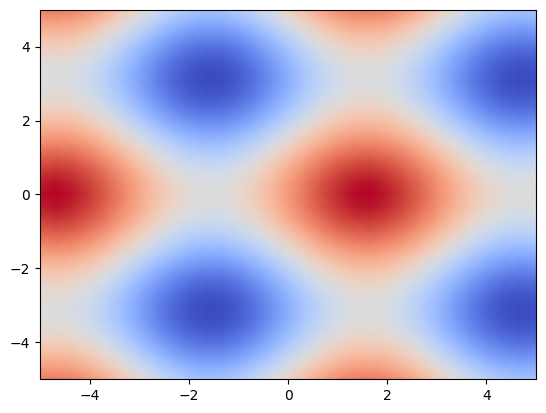

In [307]:
plt.figure()
plt.pcolormesh(X, Y, Z, shading='gouraud', cmap=plt.cm.coolwarm)

note that you may combine pcolormesh with contour plots. Here, it does not make much sense to include the color shading in the contour, otherwise the contour lines will be indistinguishable from the heatmap. Here I show the combined result with black lines.

<a list of 30 text.Text objects>

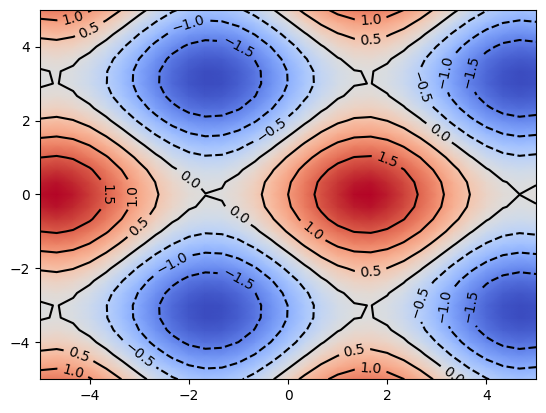

In [308]:
plt.figure()
plt.pcolormesh(X, Y, Z, shading='gouraud', cmap=plt.cm.coolwarm, zorder=1, edgecolor='face')
cs = plt.contour(X, Y, Z, colors='k', zorder=5)
plt.clabel(cs)

__Note.__ The same result would be possible with [__contourf__](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) instead of __pcolormesh__.

<a list of 30 text.Text objects>

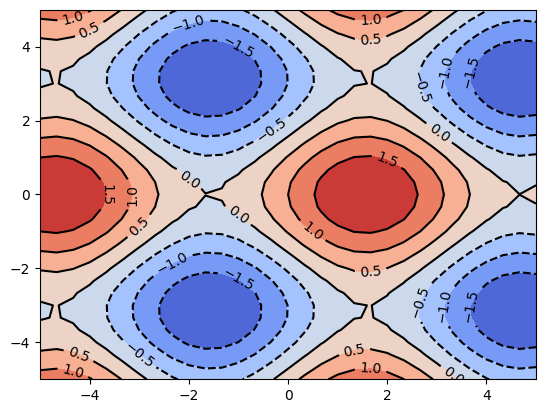

In [310]:
plt.figure()
plt.contourf(X, Y, Z, cmap=plt.cm.coolwarm, zorder=1)
cs = plt.contour(X, Y, Z, colors='k', zorder=5)
plt.clabel(cs)

### 3.5. Quiver plots

In [254]:
def F(x, y):
    return np.stack([np.cos(x), -np.sin(y)])

In [255]:
# Horizontal range
x = np.linspace(-5, 5, 31)

# Vertical range
y = np.linspace(-5, 5, 31)

# Meshgrid
X, Y = np.meshgrid(x, y)

# Points for evaluating f
pts = np.stack([np.array([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])

# Vectors z_ij = f(x_i, y_j)
U, V = F(pts[:, 0], pts[:, 1])

# Reshape into the shape of X
U = U.reshape(*X.shape)
V = V.reshape(*Y.shape)

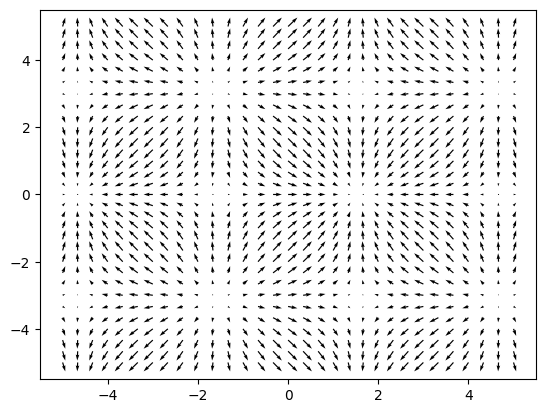

In [256]:
plt.figure()
plt.quiver(X, Y, U, V)

__Note.__ as with contourplots, you can superpose the a heatmap with the quiver plot. In the context of this example this makes particularly sense, because $F = \nabla f$. You can think of $f$ as a potential function. As such, $F$ is the gradient of a potential. By superposing the two things,

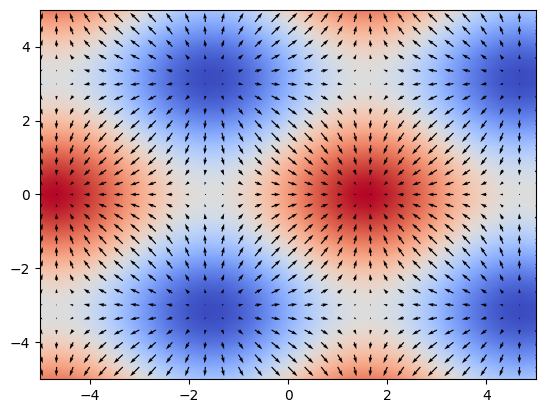

In [257]:
plt.figure()
plt.pcolormesh(X, Y, Z, shading='gouraud', cmap=plt.cm.coolwarm, zorder=1, edgecolor='face')
plt.quiver(X, Y, U, V)

you can see that $\nabla f$ points in the direction that maximizes $f$. Conversely, moving __against__ the gradient minimizes $f$,

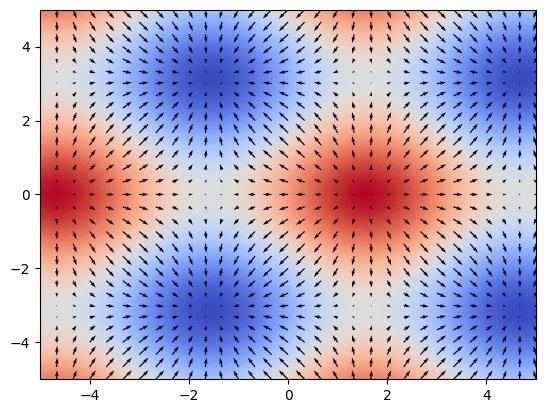

In [258]:
plt.figure()
plt.pcolormesh(X, Y, Z, shading='gouraud', cmap=plt.cm.coolwarm, zorder=1, edgecolor='face')
plt.quiver(X, Y, - U, - V)

try to think about the implications of this example.

__Food for Thought.__ Try to conceptualize this last example in the context of machine learning. How is this example related to [__gradient descent__](https://en.wikipedia.org/wiki/Gradient_descent), for instance?

Try to think about the last example in terms of Physics. If $\mathbf{x}(t)$ is the position particle at instant $t$, $f(\mathbf{x}(t)) = V(\mathbf{x}, t)$ is a potential field, whereas $\mathbf{F} = -\nabla V$ is the a force that conservates energy. By moving w.r.t. $F$, one minimizes the potential energy.

### 3.6. Irregular Grids

In the abscense of a regular grid as defined before, you need to resort to irregular grids. In this sense, [tricontour] and [tricontourf] can plot data structured as $\{(x_{i}, y_{i}, z_{i})\}_{i=1}^{n}$, where $z_{i} = f(x_{i}, y_{i})$.

In this example we want to compute the Kullback-Leibler divergence between points in a simplex. The simplex is the set,

$$\Delta_{n} = \{\mathbf{a} \in \mathbb{R}_{+}^{n}\text{ such that }\sum_{i}a_{i}=1\}$$

and the Kullback-Leibler divergence for two histograms (i.e., $\mathbf{a}, \mathbf{b}\in\Delta_{n}$) is defined as,

$$\text{KL}(\mathbf{a}|\mathbf{b}) = \sum_{i=1}^{n}a_{i}\log\biggr{(}\frac{a_{i}}{b_{i}}\biggr{)}$$

We want to calculate the $\text{KL}(\mathbf{a}|\mathbf{a}_{0})$ over $\Delta_{3}$, for $\mathbf{a}_{0} = [1/3,1/3,1/3]$. First, let us show how to do so with a __regular grid__.

__Note.__ The space $\Delta_{3}$ is defined through vectors in $\mathbb{R}^{3}$. Due the linear constraint $\sum_{i}a_{i}=1$, we may express each $\mathbf{a} \in \Delta_{3}$ as a vector in $\mathbb{R}^{2}$, i.e. $\tilde{\mathbf{a}} = (a_{0}, a_{1})$, where $a_{2} = 1 - (a_{0} + a_{1})$. I do so in the following blocks,

In [312]:
# Horizontal range
x = np.linspace(0, 1, 21)

# Vertical range
y = np.linspace(0, 1, 21)

# Meshgrid
X, Y = np.meshgrid(x, y)

# Points
pts = np.stack([np.array([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])

# Point of reference
a_0 = np.array([1/3, 1/3, 1/3])

In [313]:
pts

array([[0.  , 0.  ],
       [0.05, 0.  ],
       [0.1 , 0.  ],
       [0.15, 0.  ],
       [0.2 , 0.  ],
       [0.25, 0.  ],
       [0.3 , 0.  ],
       [0.35, 0.  ],
       [0.4 , 0.  ],
       [0.45, 0.  ],
       [0.5 , 0.  ],
       [0.55, 0.  ],
       [0.6 , 0.  ],
       [0.65, 0.  ],
       [0.7 , 0.  ],
       [0.75, 0.  ],
       [0.8 , 0.  ],
       [0.85, 0.  ],
       [0.9 , 0.  ],
       [0.95, 0.  ],
       [1.  , 0.  ],
       [0.  , 0.05],
       [0.05, 0.05],
       [0.1 , 0.05],
       [0.15, 0.05],
       [0.2 , 0.05],
       [0.25, 0.05],
       [0.3 , 0.05],
       [0.35, 0.05],
       [0.4 , 0.05],
       [0.45, 0.05],
       [0.5 , 0.05],
       [0.55, 0.05],
       [0.6 , 0.05],
       [0.65, 0.05],
       [0.7 , 0.05],
       [0.75, 0.05],
       [0.8 , 0.05],
       [0.85, 0.05],
       [0.9 , 0.05],
       [0.95, 0.05],
       [1.  , 0.05],
       [0.  , 0.1 ],
       [0.05, 0.1 ],
       [0.1 , 0.1 ],
       [0.15, 0.1 ],
       [0.2 , 0.1 ],
       [0.25,

due the constraint, the values $z_{ij} = \text{KL}([x_{i},y_{j}]|\mathbf{a}_{0})$ are not defined for all combinations of $(x_{i},y_{j})$. Indeed, we need to check whether $x_{i} + y_{j} \leq 1$,

In [314]:
Z = []

for xi, yj in pts:
    if xi + yj <= 1.0:
        a = np.array([xi, yj, 1 - (xi + yj)])
        Z.append((a * np.log(1e-11 + a / a_0)).sum())
    else:
        Z.append(np.nan)

Z = np.array(Z).reshape(*X.shape)

__Note.__ By appending ```np.nan``` to ```Z``` we are telling to matplotlib that the function is undefined outside the defined region.

Text(0.3333333333333333, 0.3833333333333333, '$\\alpha_{0}$')

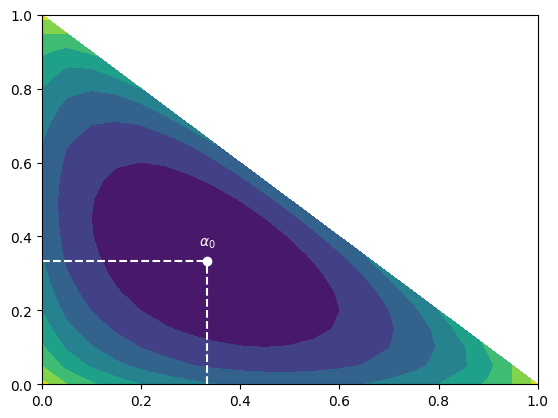

In [325]:
plt.contourf(X, Y, Z)

# Vertical Line
plt.plot([1 / 3, 1/3], [0, 1 / 3], 'w--')

# Horizontal Line
plt.plot([0, 1 / 3], [1 / 3, 1 / 3], 'w--')

# Plot point a_0
plt.scatter([1 / 3], [1 / 3], c='w')

# Text
plt.text(x=1 / 3, y=.05 + 1 / 3, s=r'$\alpha_{0}$', ha='center', va='center', c='w')

The same result could be generated with an irregular grid,

In [326]:
# Creates irregular grid
irregular_grid = []

for pt in pts:
    if pt.sum() <= 1.0:
        irregular_grid.append(pt)

irregular_grid = np.stack(irregular_grid)

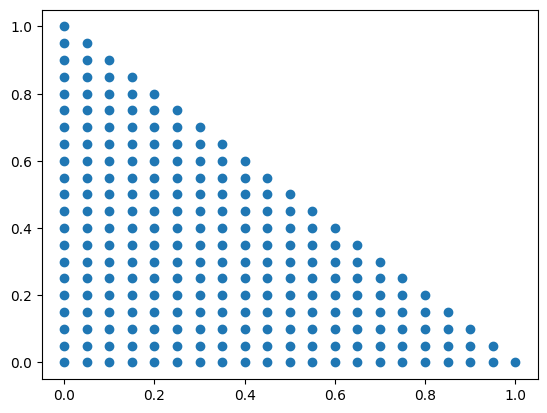

In [327]:
plt.scatter(irregular_grid[:, 0], irregular_grid[:, 1])

In [328]:
new_column = 1 - irregular_grid.sum(axis=1)
pts = np.concatenate([irregular_grid, new_column[:, None]], axis=1)

In [329]:
kl = (pts * np.log(1e-11 + pts / a_0.reshape(1, -1))).sum(axis=1)

Text(0.3333333333333333, 0.3833333333333333, '$\\alpha_{0}$')

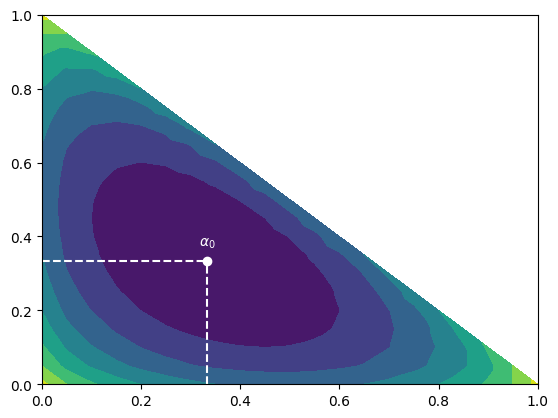

In [330]:
plt.tricontourf(pts[:, 0], pts[:, 1], kl)

# Vertical Line
plt.plot([1/3, 1/3], [0, 1/3], 'w--')

# Horizontal Line
plt.plot([0, 1/3], [1/3, 1/3], 'w--')

plt.scatter([1/3], [1/3], c='w')

# Text
plt.text(x=1 / 3, y=.05 + 1 / 3, s=r'$\alpha_{0}$', ha='center', va='center', c='w')

## 4. 3D Plotting

[Matplotlib's Example Gallery](https://matplotlib.org/stable/gallery/mplot3d/index.html)

### 4.1. Scatter Plots

To exemplify 3-D scatter plots, let us visualize the color of pixels in the color RGB color space. First, let us use the astonaut image again,

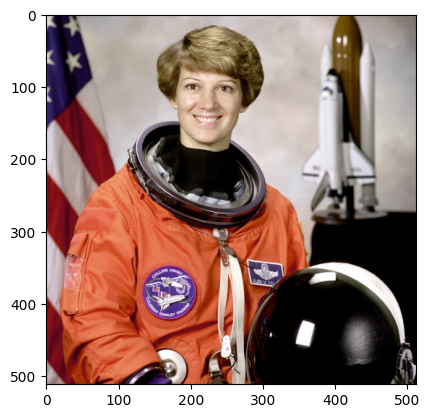

In [79]:
im = data.astronaut().astype(float) / 255
plt.imshow(im)

After casting each pixel to $[0, 1]$, we can reshape the array to a new matrix $\mathbf{X}^{hw\times 3}$. Here, we interpret each pixel RGB value as a point in a 3-D space,

In [91]:
X = im.reshape(-1, 3)
print(im.shape, X.shape)

(512, 512, 3) (262144, 3)


Note that this generate a huge array. We need to downsize it for visualize it properly. We are going to subsample $4096$ samples from it. Note that this corresponds to only $100 \times 4096 / 262144 \approx 1.6\%$ of the total amount of pixels. Nonethelss, the scatterplot is still informative,

In [92]:
all_pixels = np.arange(len(X))
selected_pixels = np.random.choice(all_pixels, size=4096)
X = X[selected_pixels, :]

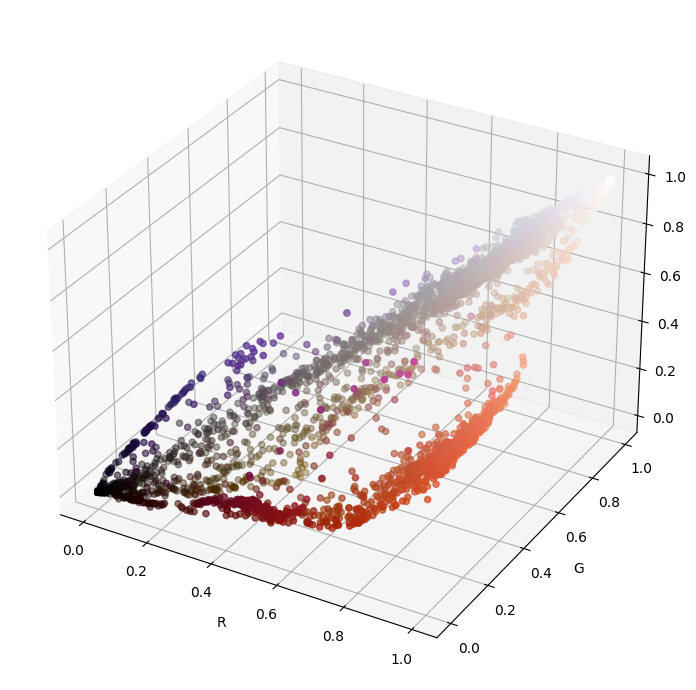

In [93]:
# Creates figure
fig = plt.figure(figsize=(7, 7))

# Adds 3D axis
ax = fig.add_subplot(projection='3d')

# Creates the scatterplot
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=X)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.tight_layout()

### 4.2. Line Plot

In [368]:
def f(x, y):
    return np.exp(- 0.5 * (x ** 2 + y ** 2)) * (x + y)

In [371]:
r = np.linspace(0, 1, 31)
theta = np.linspace(0, 2 * np.pi, 31)
x = r * np.cos(theta)
y = r * np.sin(theta)

z = f(r, theta)

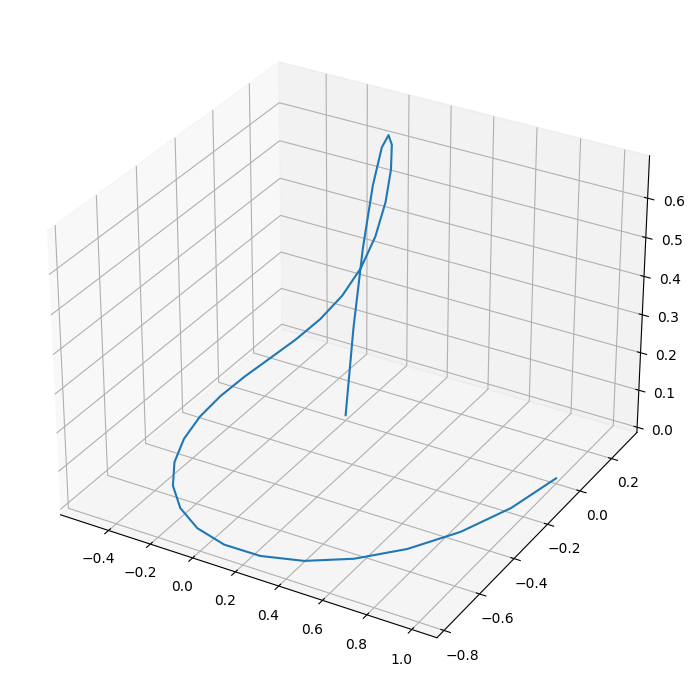

In [372]:
# Creates figure
fig = plt.figure(figsize=(7, 7))

# Adds 3D axis
ax = fig.add_subplot(projection='3d')

# Creates the scatterplot
ax.plot(x, y, z)

plt.tight_layout()

### 4.3. Surface Plot

In [373]:
def f(x, y):
    return np.sin(x) + np.cos(y)

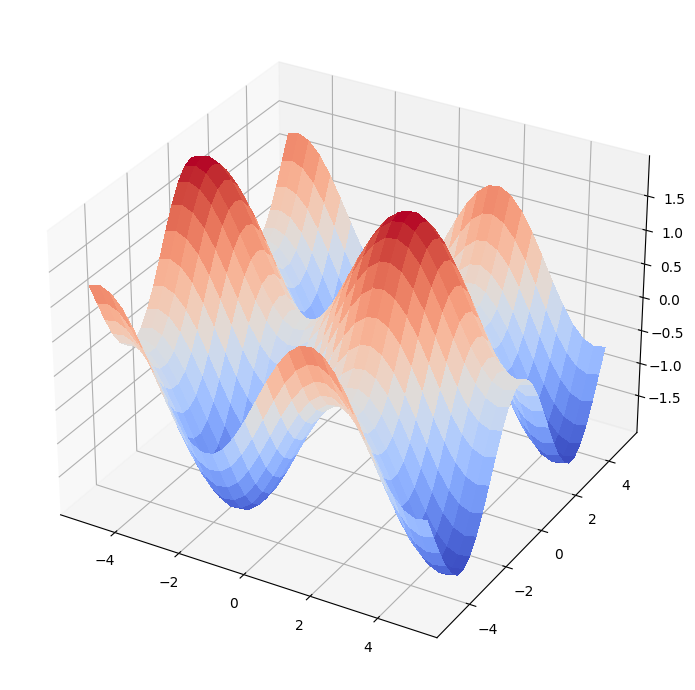

In [375]:
# Horizontal range
x = np.linspace(-5, 5, 31)

# Vertical range
y = np.linspace(-5, 5, 31)

# Meshgrid
X, Y = np.meshgrid(x, y)

# Points for evaluating f
pts = np.stack([np.array([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])

# Values z_ij = f(x_i, y_j)
values = f(pts[:, 0], pts[:, 1])

# Reshape into the shape of X
Z = values.reshape(*X.shape)

# Creates figure
fig = plt.figure(figsize=(7, 7))

# Adds 3D axis
ax = fig.add_subplot(projection='3d')

# Creates the scatterplot
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                linewidth=0, antialiased=False)

plt.tight_layout()

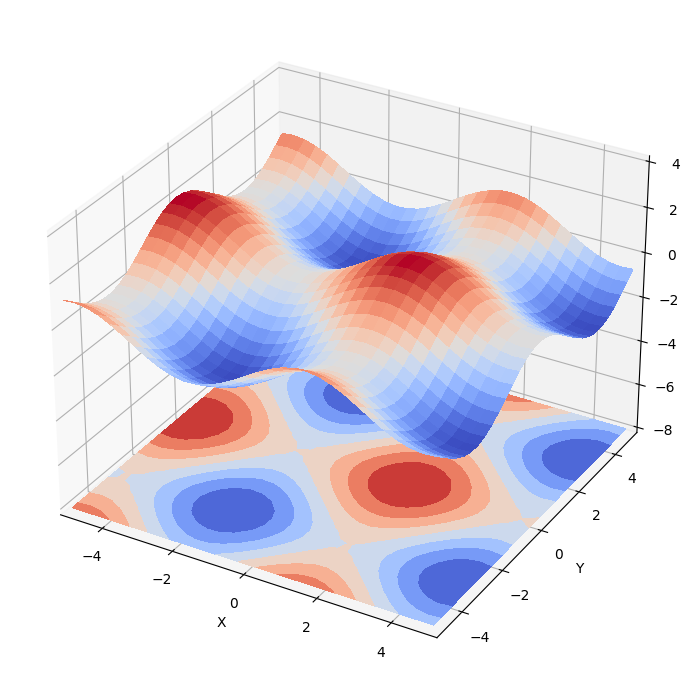

In [418]:
# Horizontal range
x = np.linspace(-5, 5, 31)

# Vertical range
y = np.linspace(-5, 5, 31)

# Meshgrid
X, Y = np.meshgrid(x, y)

# Points for evaluating f
pts = np.stack([np.array([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])

# Values z_ij = f(x_i, y_j)
values = f(pts[:, 0], pts[:, 1])

# Reshape into the shape of X
Z = values.reshape(*X.shape)

# Creates figure
fig = plt.figure(figsize=(7, 7))

# Adds 3D axis
ax = fig.add_subplot(projection='3d')

# Creates the scatterplot
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                linewidth=0, antialiased=False)
ax.contourf(X, Y, Z, zdir='z', cmap=plt.cm.coolwarm, offset=-8)

ax.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(-8, 4),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.tight_layout()

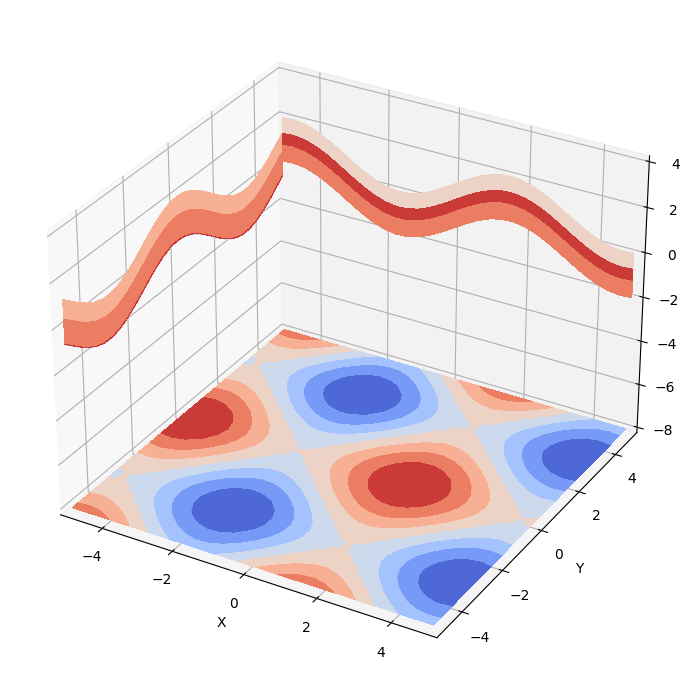

In [404]:
# Horizontal range
x = np.linspace(-5, 5, 31)

# Vertical range
y = np.linspace(-5, 5, 31)

# Meshgrid
X, Y = np.meshgrid(x, y)

# Points for evaluating f
pts = np.stack([np.array([xi, yi]) for xi, yi in zip(X.flatten(), Y.flatten())])

# Values z_ij = f(x_i, y_j)
values = f(pts[:, 0], pts[:, 1])

# Reshape into the shape of X
Z = values.reshape(*X.shape)

# Creates figure
fig = plt.figure(figsize=(7, 7))

# Adds 3D axis
ax = fig.add_subplot(projection='3d')

# Creates the scatterplot


ax.contourf(X, Y, Z, zdir='x', cmap=plt.cm.coolwarm, offset=-5)
ax.contourf(X, Y, Z, zdir='y', cmap=plt.cm.coolwarm, offset=5)
ax.contourf(X, Y, Z, zdir='z', cmap=plt.cm.coolwarm, offset=-8)

ax.set(xlim=(-5, 5), ylim=(-5, 5), zlim=(-8, 4),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.tight_layout()